# **Import libraries and functions**

In [83]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## **1.1 Loading and inspecting data**

In [84]:
url='/kaggle/input/gobank-dataset11/GOBank.csv'

In [85]:
#loading data
records = pd.read_csv(url)

records.head()

,CustomerID,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
0,CU318939,32,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,Yes,No,No,Inbound,172.0,July,Wednesday,2,0.0,Nonexistent,4.963,1.4,93.918,No Sale
1,CU935403,39,Bachelor Degree Level or Higher,Clerical and administrative,Married,No,No,No,Outbound,744.0,May,Monday,6,0.0,Nonexistent,4.857,1.1,93.994,Sale
2,CU792919,36,Graduate Diploma and Graduate Certificate,Technicians and Trades,Divorced,No,No,No,Inbound,31.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
3,CU168904,44,Primary Education,Labourer,Married,Yes,No,No,Inbound,102.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
4,CU442580,38,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,No,No,No,Outbound,436.0,May,Thursday,1,0.0,Nonexistent,4.860,1.1,93.994,No Sale


## **1.2 Pre-processing data and EDA**

### **Inspecting and cleansing data**
* Inspect data size and types
* Correct the format
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


**Inspect data size and types**

In [86]:
##Write code to inspect columns and data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         22940 non-null  object 
 1   Age                                22940 non-null  int64  
 2   Qualification                      22778 non-null  object 
 3   Occupation                         22940 non-null  object 
 4   Marital Status                     22940 non-null  object 
 5   Home Mortgage                      22940 non-null  object 
 6   Personal Loan                      22940 non-null  object 
 7   Has Other Bank Account             22940 non-null  object 
 8   Last Contact Direction             22893 non-null  object 
 9   Last Contact Duration              22799 non-null  float64
 10  Last Contact Month                 22940 non-null  object 
 11  Last Contact Weekday               22940 non-null  obj

**Correct the format as needed**

In [87]:
import pandas as pd

# Assuming you've loaded your data into a DataFrame named 'records'
# For example, from a CSV file:
# records = pd.read_csv('your_dataset.csv')

# Display initial data types
print("Initial data types:\n", records.dtypes)

# Convert numeric fields to appropriate data types
records['CustomerID'] = records['CustomerID'].astype(str)
records['Age'] = pd.to_numeric(records['Age'], errors='coerce')
records['Last Contact Duration'] = pd.to_numeric(records['Last Contact Duration'], errors='coerce')
records['Number of Current Campaign Calls'] = pd.to_numeric(records['Number of Current Campaign Calls'], errors='coerce')
records['Number of Previous Campaign Calls'] = pd.to_numeric(records['Number of Previous Campaign Calls'], errors='coerce')
records['RBA Cash Rate'] = pd.to_numeric(records['RBA Cash Rate'], errors='coerce')
records['Employment Variation Rate'] = pd.to_numeric(records['Employment Variation Rate'], errors='coerce')
records['Consumer Confidence Index'] = pd.to_numeric(records['Consumer Confidence Index'], errors='coerce')

# Handle categorical fields
categorical_fields = [
    'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction',
    'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome', 'Sale Outcome'
]
for field in categorical_fields:
    records[field] = records[field].astype('category')

# Fill missing values if necessary (example: fill with median for numeric fields)
for column in records.select_dtypes(include=['float64', 'int64']):
    records[column].fillna(records[column].median(), inplace=True)

# Display data types after conversion
print("Data types after conversion:\n", records.dtypes)

# Optionally save the cleaned dataset
# records.to_csv('cleaned_dataset.csv', index=False)

# Sample output of the processed DataFrame
print(records.head())


Initial data types:
 CustomerID                            object
Age                                    int64
Qualification                         object
Occupation                            object
Marital Status                        object
Home Mortgage                         object
Personal Loan                         object
Has Other Bank Account                object
Last Contact Direction                object
Last Contact Duration                float64
Last Contact Month                    object
Last Contact Weekday                  object
Number of Current Campaign Calls       int64
Number of Previous Campaign Calls    float64
Previous Campaign Outcome             object
RBA Cash Rate                        float64
Employment Variation Rate            float64
Consumer Confidence Index            float64
Sale Outcome                          object
dtype: object
Data types after conversion:
 CustomerID                             object
Age                               

**Drop irrelevant columns**

In [88]:
# Remove customer IDs from the data set
records = records.drop(['CustomerID'], axis = 1)

**Detect and handle missing data as needed**

In [89]:
#Inspect missing data
print(records.isnull().sum())

Age                                    0
Qualification                        162
Occupation                             0
Marital Status                         0
Home Mortgage                          0
Personal Loan                          0
Has Other Bank Account                 0
Last Contact Direction                47
Last Contact Duration                  0
Last Contact Month                     0
Last Contact Weekday                   0
Number of Current Campaign Calls       0
Number of Previous Campaign Calls      0
Previous Campaign Outcome            206
RBA Cash Rate                          0
Employment Variation Rate              0
Consumer Confidence Index              0
Sale Outcome                           0
dtype: int64


In [90]:
# Fill missing values
records['Qualification'].fillna(records['Qualification'].mode()[0], inplace=True)
records['Last Contact Direction'].fillna(records['Last Contact Direction'].mode()[0], inplace=True)
records['Last Contact Duration'].fillna(records['Last Contact Duration'].mean(), inplace=True)
records['Number of Previous Campaign Calls'].fillna(records['Number of Previous Campaign Calls'].mean(), inplace=True)
records['Previous Campaign Outcome'].fillna(records['Previous Campaign Outcome'].mode()[0], inplace=True)


In [91]:
#Inspect missing data
print(records.isnull().sum())

Age                                  0
Qualification                        0
Occupation                           0
Marital Status                       0
Home Mortgage                        0
Personal Loan                        0
Has Other Bank Account               0
Last Contact Direction               0
Last Contact Duration                0
Last Contact Month                   0
Last Contact Weekday                 0
Number of Current Campaign Calls     0
Number of Previous Campaign Calls    0
Previous Campaign Outcome            0
RBA Cash Rate                        0
Employment Variation Rate            0
Consumer Confidence Index            0
Sale Outcome                         0
dtype: int64


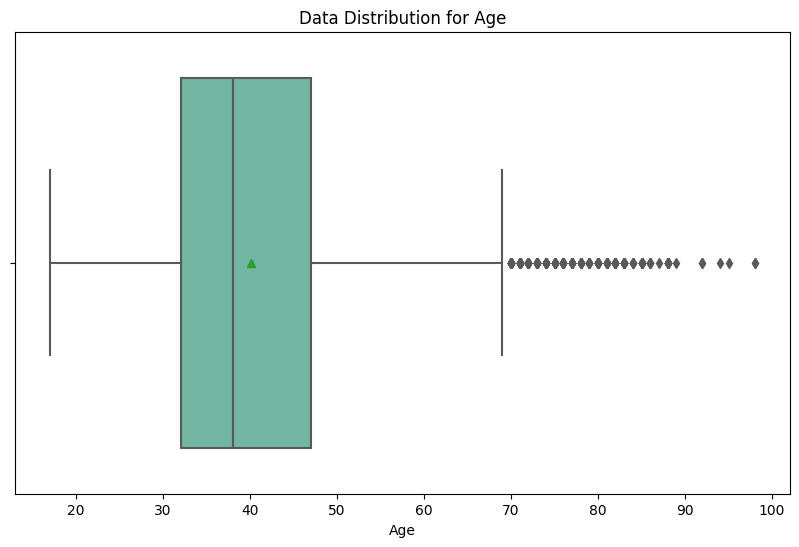

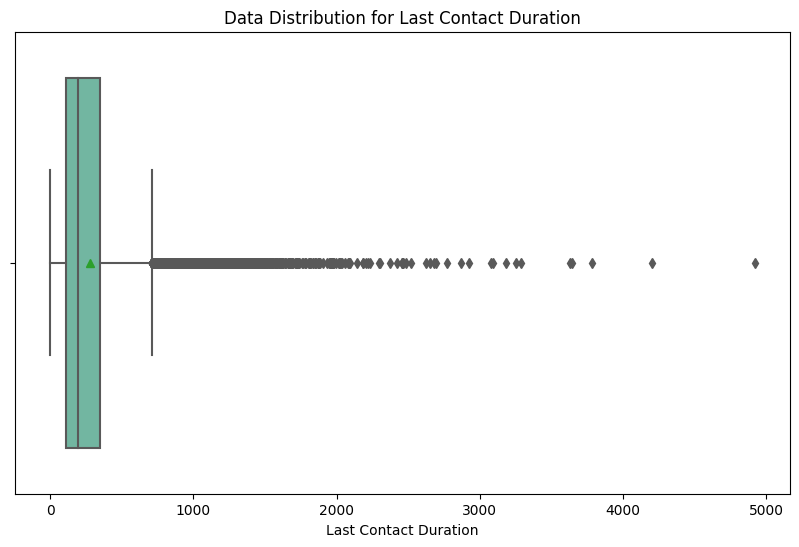

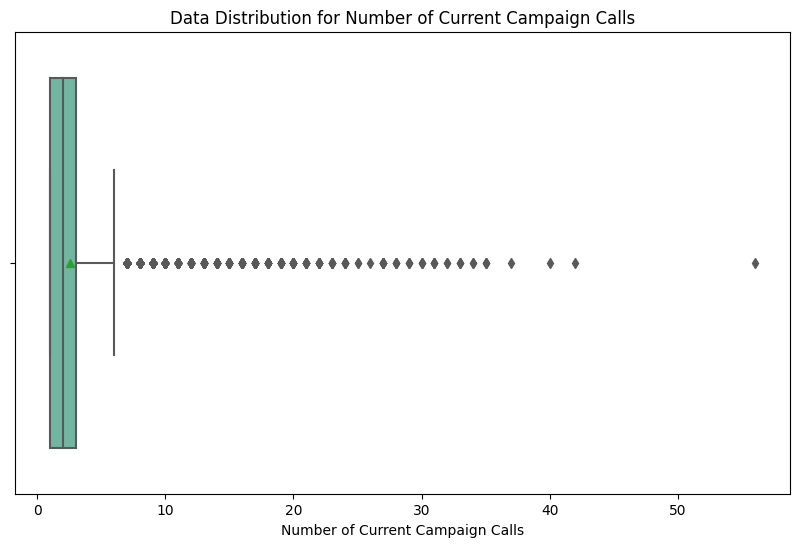

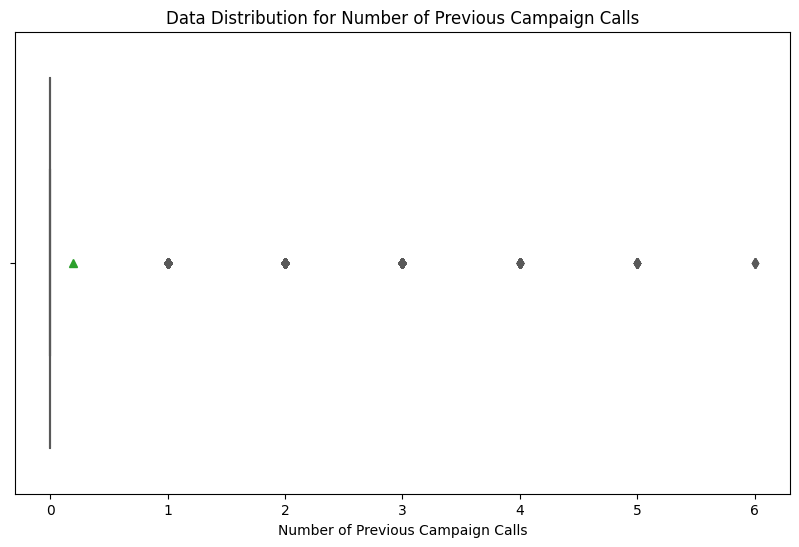

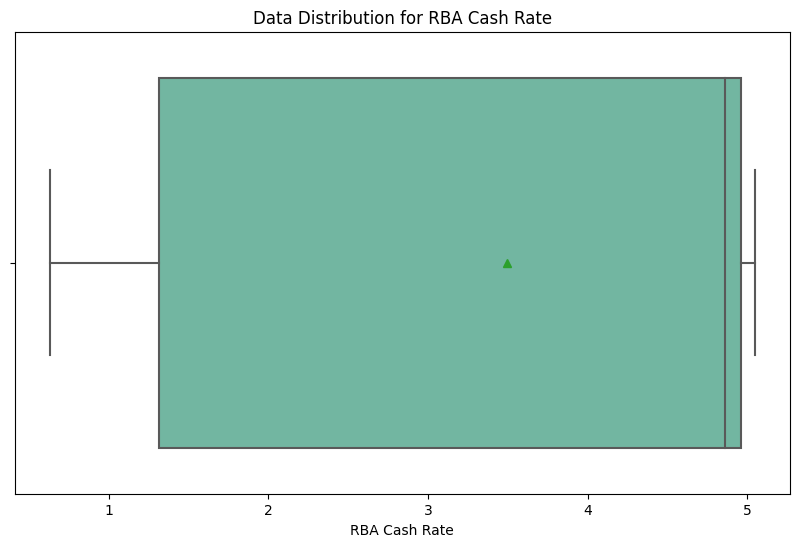

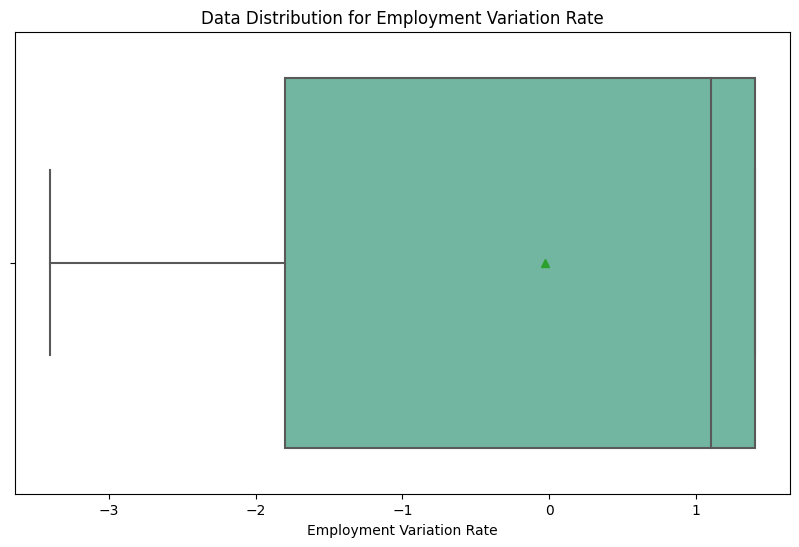

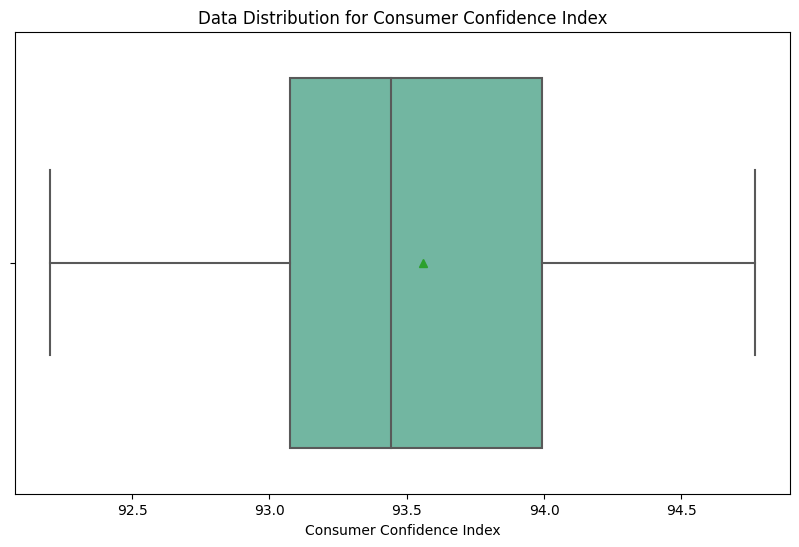

In [92]:
# List of numeric columns to check
numeric_columns = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 
                   'Number of Previous Campaign Calls', 'RBA Cash Rate', 
                   'Employment Variation Rate', 'Consumer Confidence Index']

# Check data distribution of numeric variables with missing data using boxplot
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=records, x=column, showmeans=True, palette='Set2')
    plt.title(f'Data Distribution for {column}')
    plt.show()


---



**Univariate analysis**

*Explore the target variable*

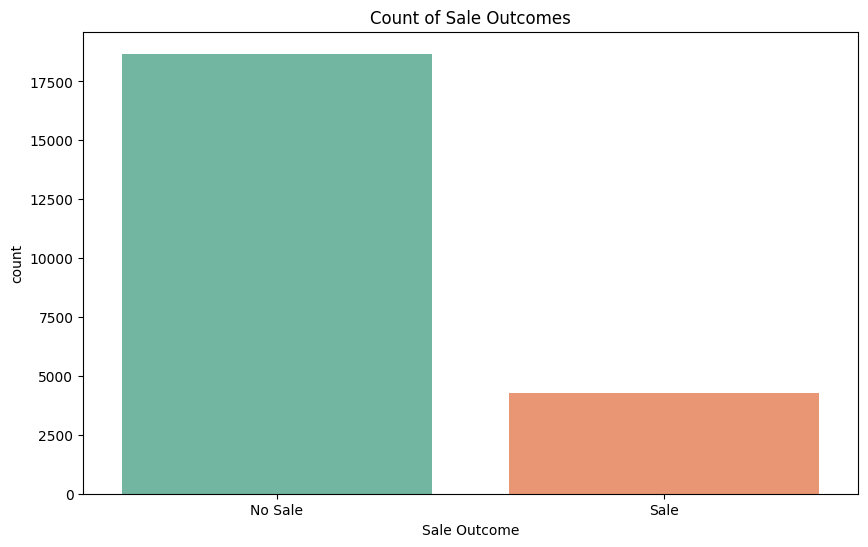

In [93]:
# Plot the count of 'Sale Outcome'
plt.figure(figsize=(10, 6))
sns.countplot(data=records, x='Sale Outcome', palette='Set2')
plt.title('Count of Sale Outcomes')
plt.show()

In [94]:
# Count the occurrences of each unique value in 'Sale Outcome'
sale_outcome_counts = records['Sale Outcome'].value_counts()
print(sale_outcome_counts)

Sale Outcome
No Sale    18677
Sale        4263
Name: count, dtype: int64


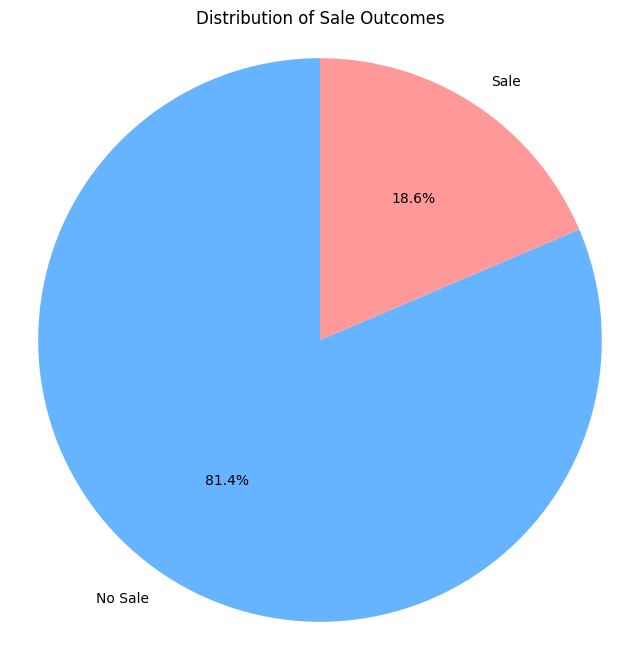

In [95]:
# Count the occurrences of each unique value in 'Sale Outcome'
sale_outcome_counts = records['Sale Outcome'].value_counts()

# Labels for the pie chart
sale_labels = sale_outcome_counts.index

# Generate a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sale_outcome_counts, labels=sale_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Sale Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

*Univariate analysis: Explore other categorical variables*

Qualification :

Qualification
Primary Education                            6996
Bachelor Degree Level or Higher              6815
High School Certificate                      5198
Graduate Diploma and Graduate Certificate    2934
Prefer not to say                             982
Pre-Primary Education                          15
Name: count, dtype: int64




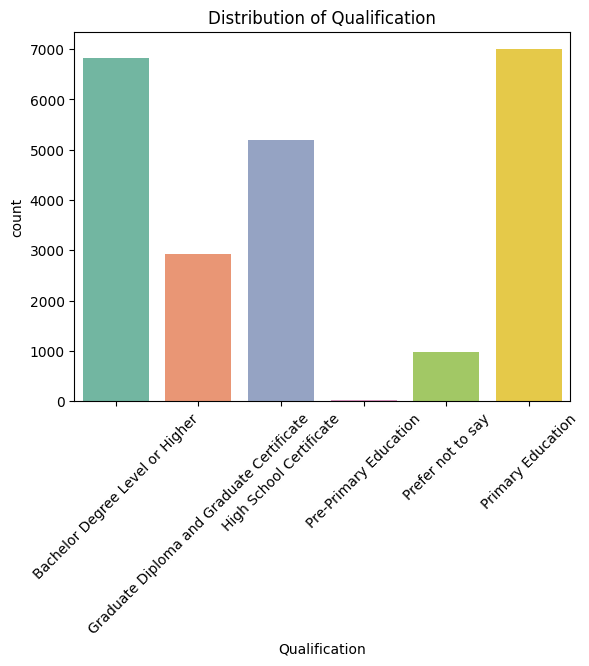

Occupation :

Occupation
Clerical and administrative       5850
Labourer                          5036
Technicians and Trades            3726
Community and personal service    2169
Manager                           1642
Retired                           1086
Entrepreneur                       813
Self-employed                      749
Housekeeper                        593
Student                            558
Unemployed                         536
Prefer not to say                  182
Name: count, dtype: int64




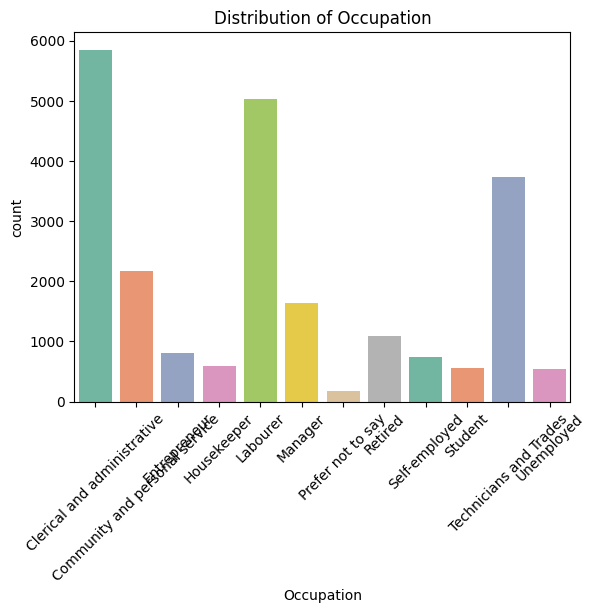

Marital Status :

Marital Status
Married              13804
Single                6526
Divorced              2559
Prefer not to say       51
Name: count, dtype: int64




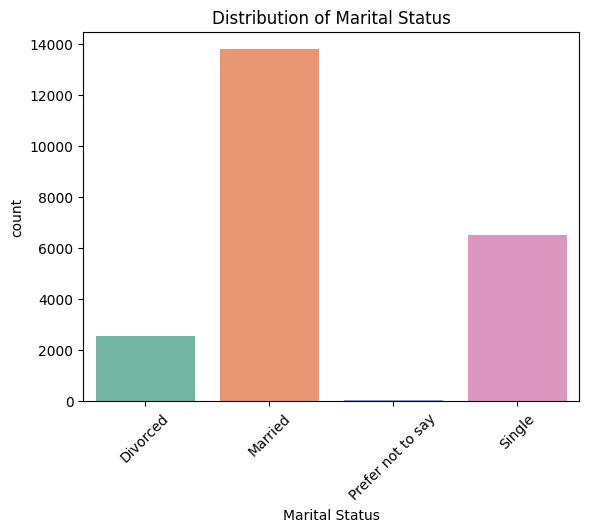

Home Mortgage :

Home Mortgage
Yes        12086
No         10284
Unknown      570
Name: count, dtype: int64




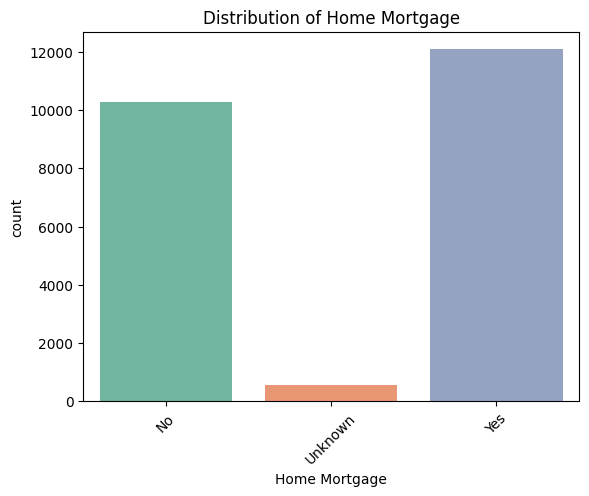

Personal Loan :

Personal Loan
No         18877
Yes         3493
Unknown      570
Name: count, dtype: int64




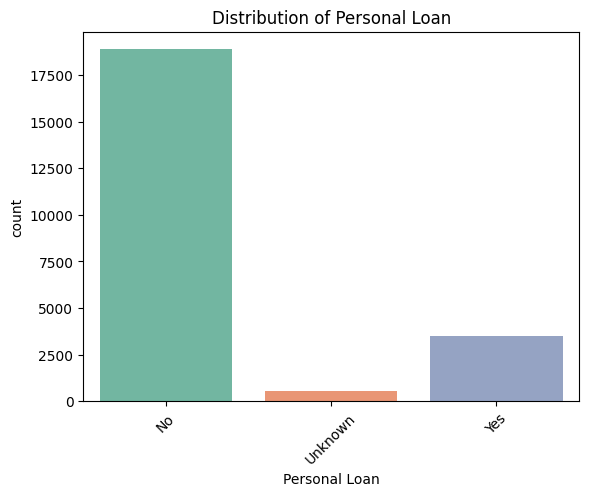

Has Other Bank Account :

Has Other Bank Account
No     18378
Yes     4562
Name: count, dtype: int64




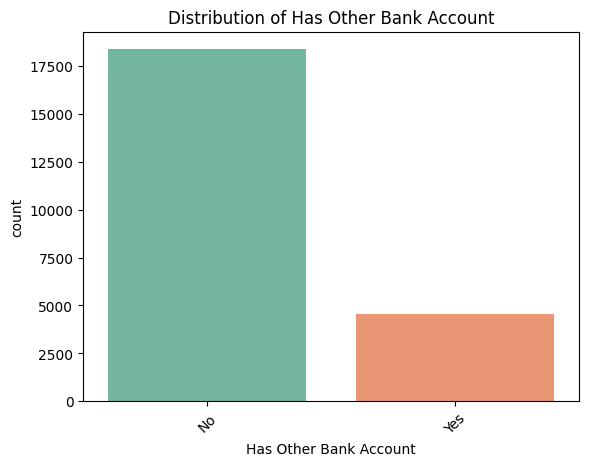

Last Contact Direction :

Last Contact Direction
Inbound     14904
Outbound     8036
Name: count, dtype: int64




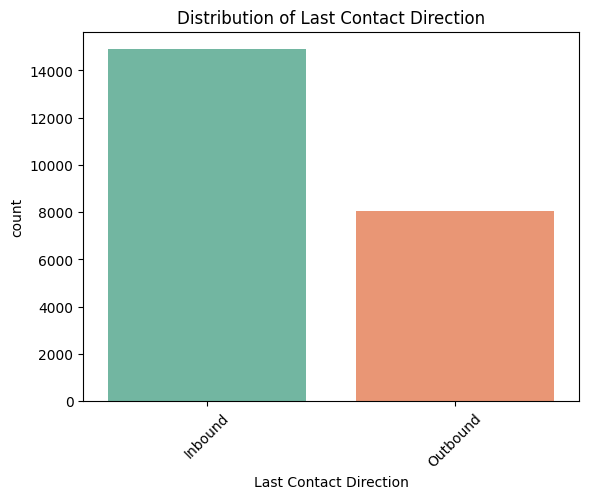

Last Contact Month :

Last Contact Month
May          7442
July         3919
August       3449
June         2937
November     2239
April        1534
October       509
September     393
March         389
December      129
Name: count, dtype: int64




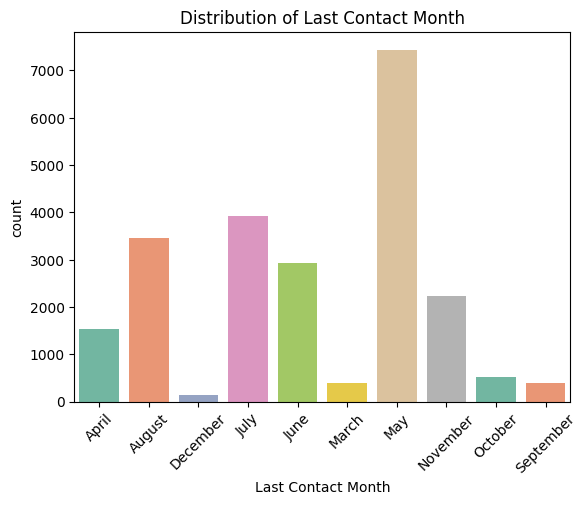

Last Contact Weekday :

Last Contact Weekday
Thursday     4812
Monday       4723
Wednesday    4567
Tuesday      4525
Friday       4313
Name: count, dtype: int64




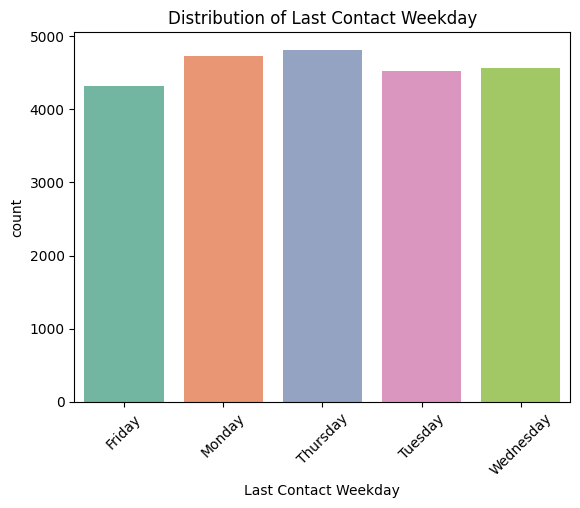

Previous Campaign Outcome :

Previous Campaign Outcome
Nonexistent    19505
No Sale         2381
Sale            1054
Name: count, dtype: int64




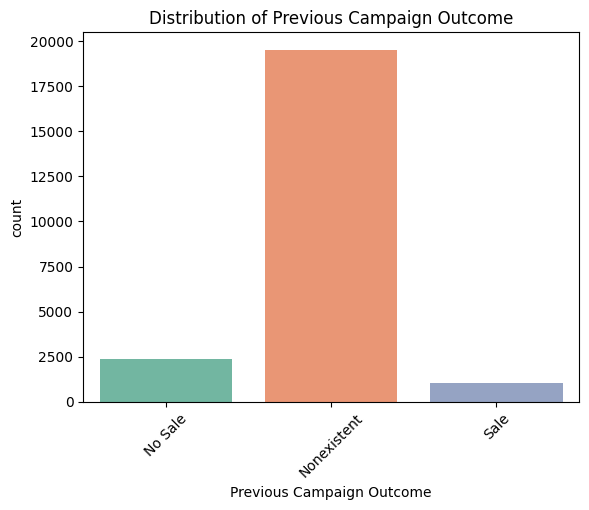

Sale Outcome :

Sale Outcome
No Sale    18677
Sale        4263
Name: count, dtype: int64




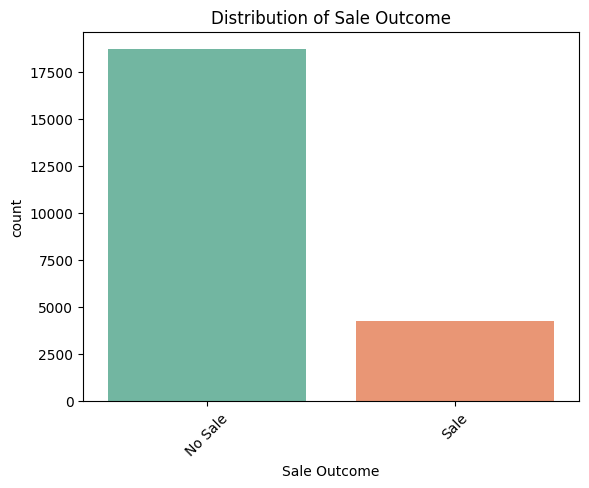

In [96]:
# List of categorical columns
cats = [
    'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction',
    'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome', 'Sale Outcome'
]

# Iterate through each categorical column, print value counts, and plot countplot
for i in cats:
    print(i, ':\n')
    print(records[i].value_counts())
    print('\n')
    sns.countplot(data=records, x=i, palette='Set2')
    # Rotate labels on the x-axis for better readability
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {i}')
    plt.show()

*Univariate analysis: Explore numeric variables*

In [97]:
##Write code to have an overview of descriptive stats of numeric variables; hint: use describe()
records.describe()

,Age,Last Contact Duration,Number of Current Campaign Calls,Number of Previous Campaign Calls,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index
count,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000
mean,40.097602,281.823147,2.542938,0.199215,3.495762,-0.027541,93.557365
std,10.799192,285.375802,2.702480,0.543082,1.785776,1.619152,0.592104
min,17.000000,0.000000,1.000000,0.000000,0.634000,-3.400000,92.201000
25%,32.000000,108.000000,1.000000,0.000000,1.313000,-1.800000,93.075000
50%,38.000000,192.000000,2.000000,0.000000,4.857000,1.100000,93.444000
75%,47.000000,348.000000,3.000000,0.000000,4.961000,1.400000,93.994000
max,98.000000,4918.000000,56.000000,6.000000,5.045000,1.400000,94.767000


See the above outcome: note the range across variables;
note mean and std, note mean and median, IQR.. for each numeric variable,

Age :

count    22940.000000
mean        40.097602
std         10.799192
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: Age, dtype: float64




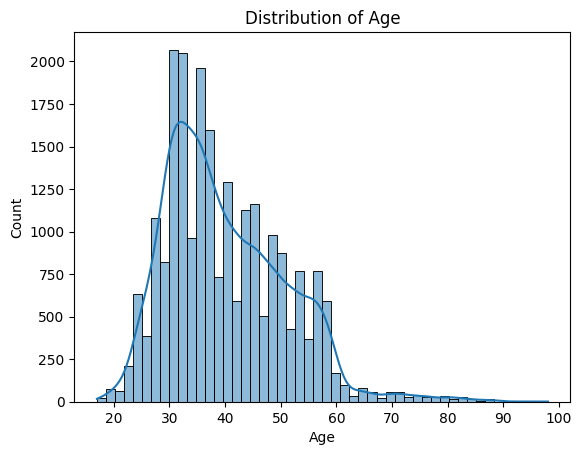

Last Contact Duration :

count    22940.000000
mean       281.823147
std        285.375802
min          0.000000
25%        108.000000
50%        192.000000
75%        348.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64




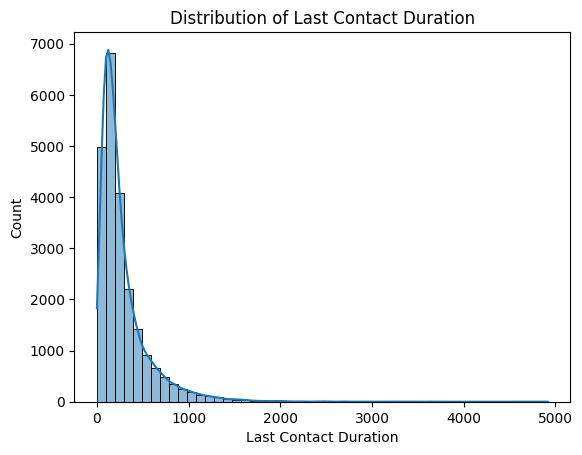

Number of Current Campaign Calls :

count    22940.000000
mean         2.542938
std          2.702480
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: Number of Current Campaign Calls, dtype: float64




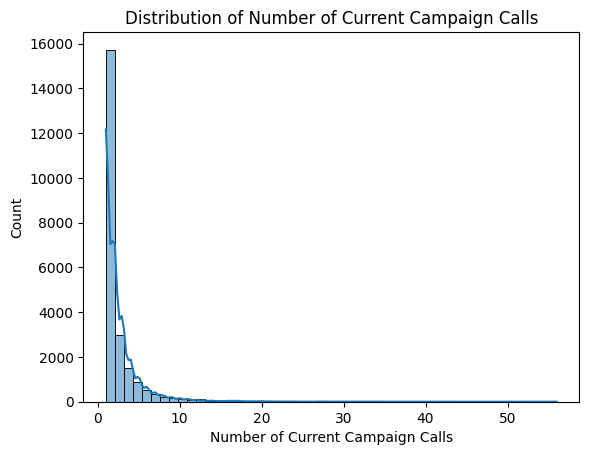

Number of Previous Campaign Calls :

count    22940.000000
mean         0.199215
std          0.543082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Number of Previous Campaign Calls, dtype: float64




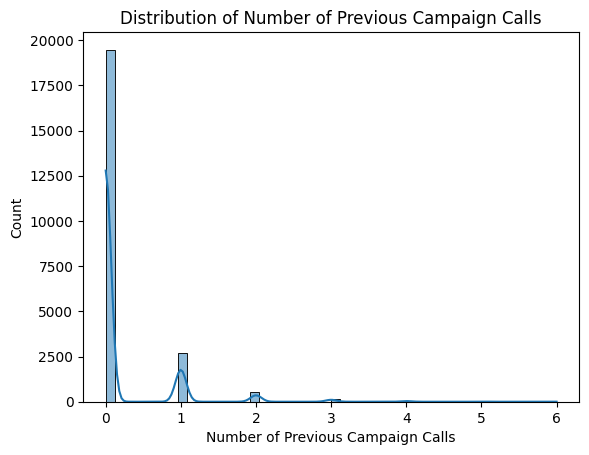

RBA Cash Rate :

count    22940.000000
mean         3.495762
std          1.785776
min          0.634000
25%          1.313000
50%          4.857000
75%          4.961000
max          5.045000
Name: RBA Cash Rate, dtype: float64




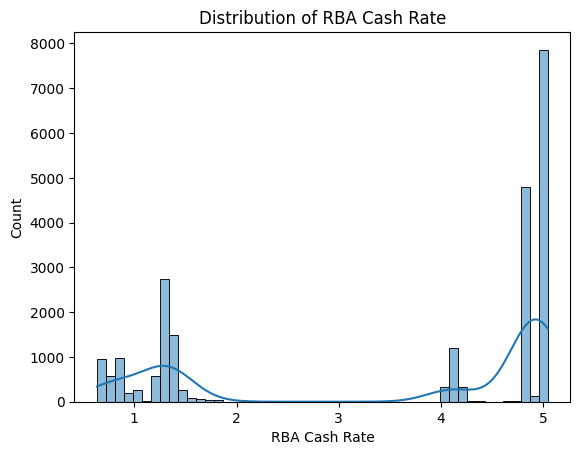

Employment Variation Rate :

count    22940.000000
mean        -0.027541
std          1.619152
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: Employment Variation Rate, dtype: float64




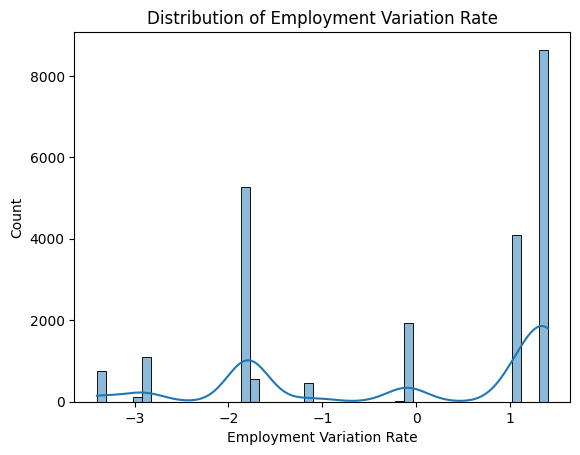

Consumer Confidence Index :

count    22940.000000
mean        93.557365
std          0.592104
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: Consumer Confidence Index, dtype: float64




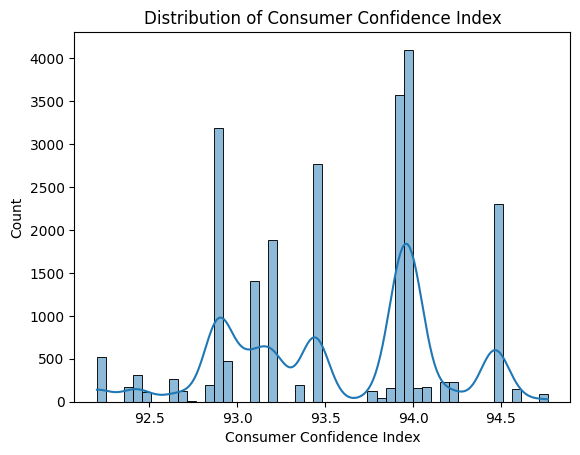

In [98]:
# List of numerical columns
nums = [
    'Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 
    'Number of Previous Campaign Calls', 'RBA Cash Rate', 
    'Employment Variation Rate', 'Consumer Confidence Index'
]

# Iterate through each numerical column, print descriptive statistics, and plot histogram
for i in nums:
    print(i, ':\n')
    print(records[i].describe())
    print('\n')
    sns.histplot(data=records, x=i, bins=50, kde=True, palette='Set2')
    plt.title(f'Distribution of {i}')
    plt.show()

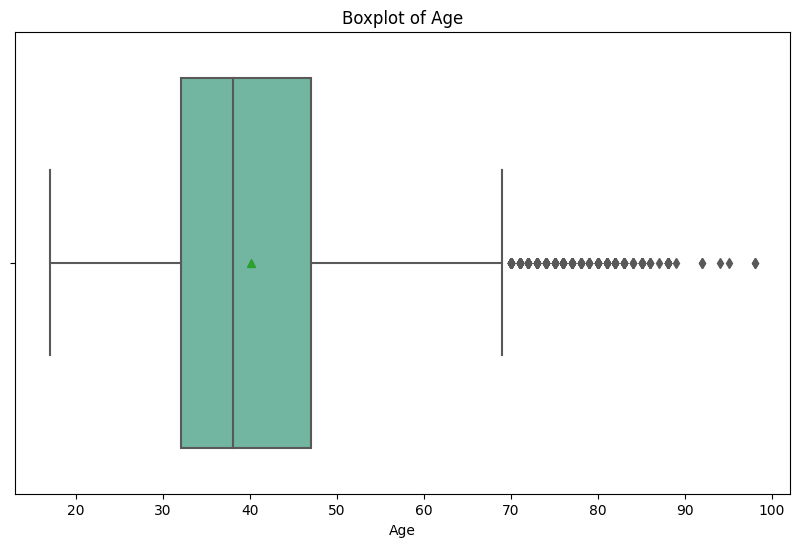

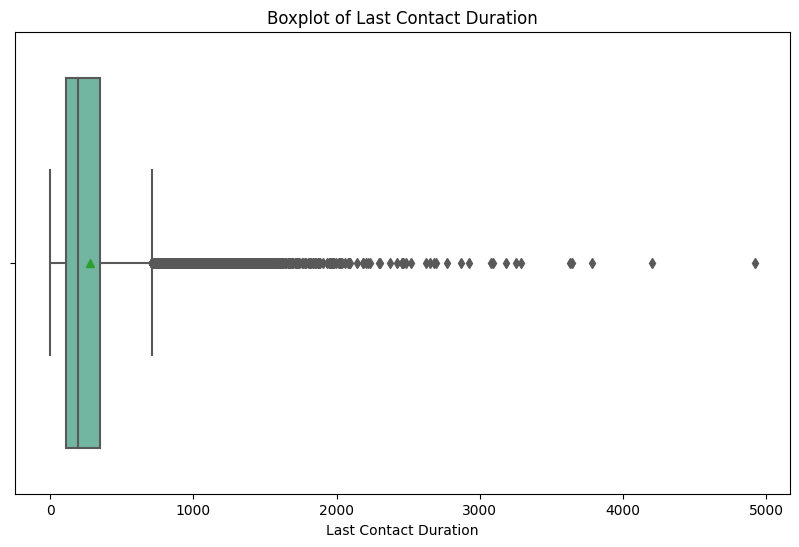

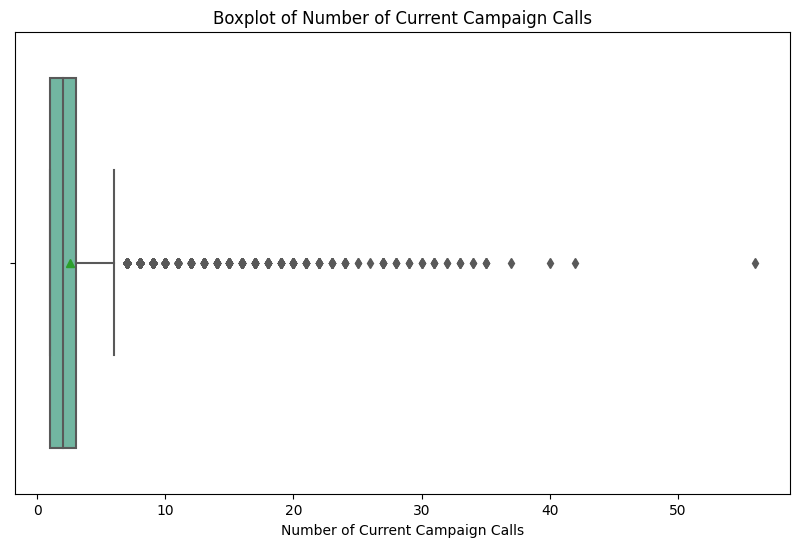

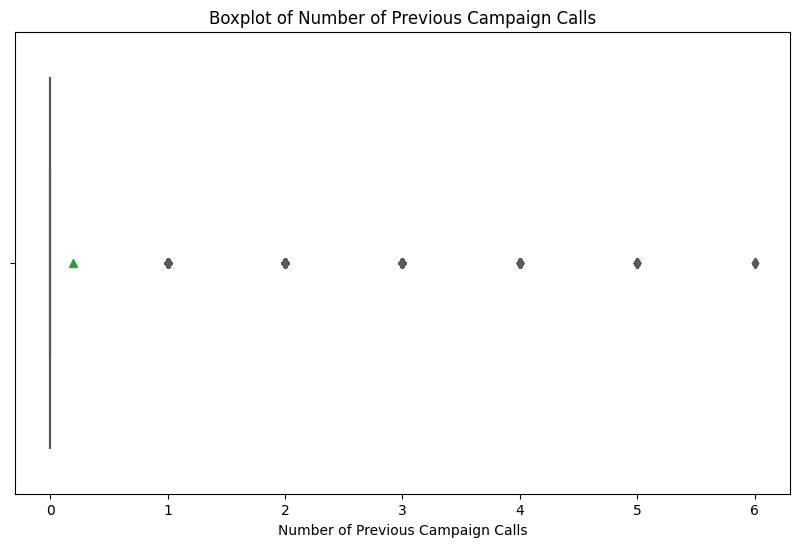

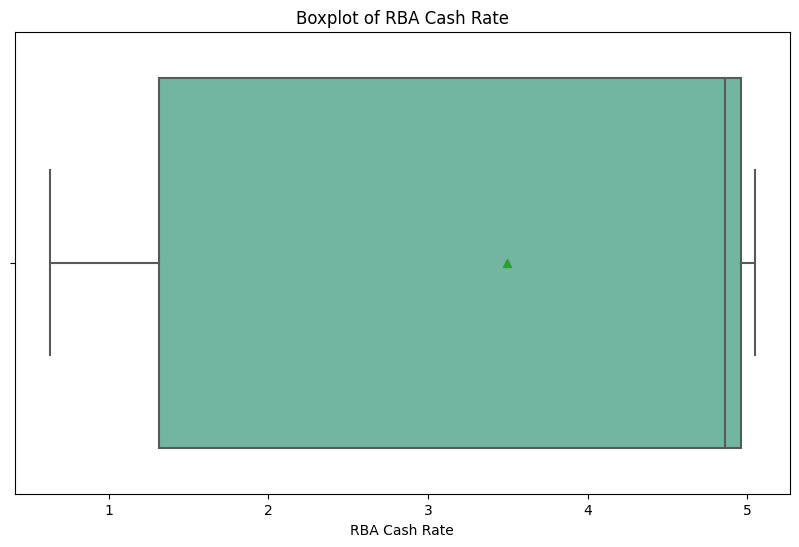

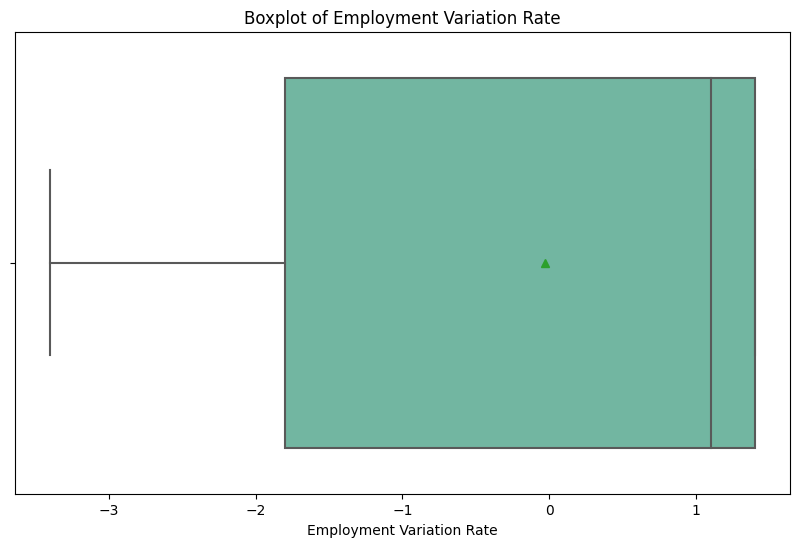

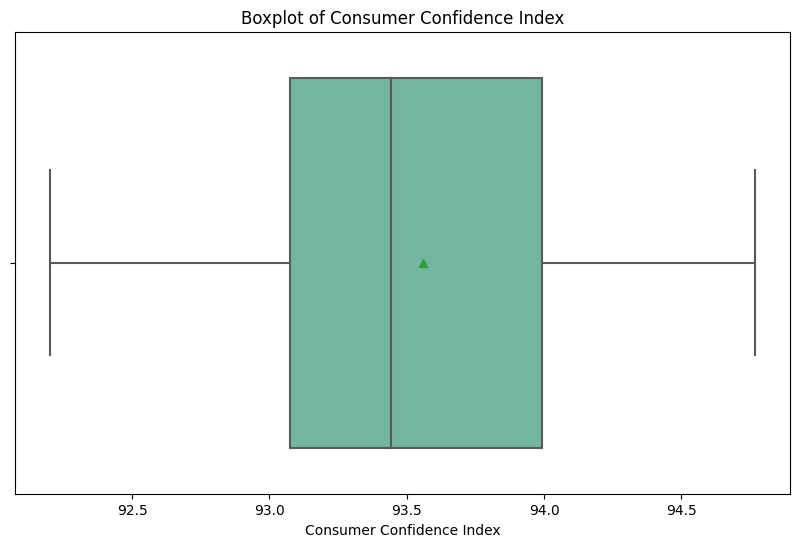

In [99]:

# List of numerical columns
nums = [
    'Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 
    'Number of Previous Campaign Calls', 'RBA Cash Rate', 
    'Employment Variation Rate', 'Consumer Confidence Index'
]

# Iterate through each numerical column and create boxplots
for i in nums:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=records, x=i, showmeans=True, palette='Set2')
    plt.title(f'Boxplot of {i}')
    plt.show()

**Bivariabe analysis**

*Between numeric variables*

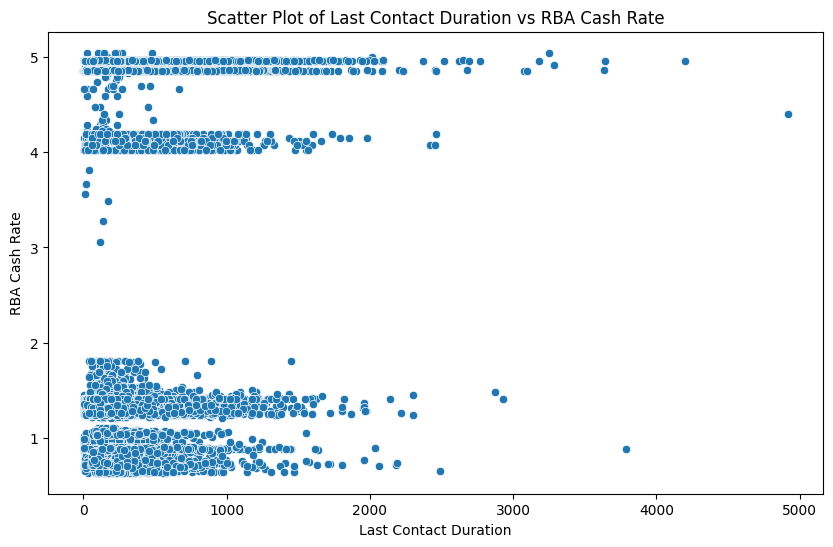

In [100]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=records, x='Last Contact Duration', y='RBA Cash Rate', palette='Set2')
plt.title('Scatter Plot of Last Contact Duration vs RBA Cash Rate')
plt.xlabel('Last Contact Duration')
plt.ylabel('RBA Cash Rate')
plt.show()

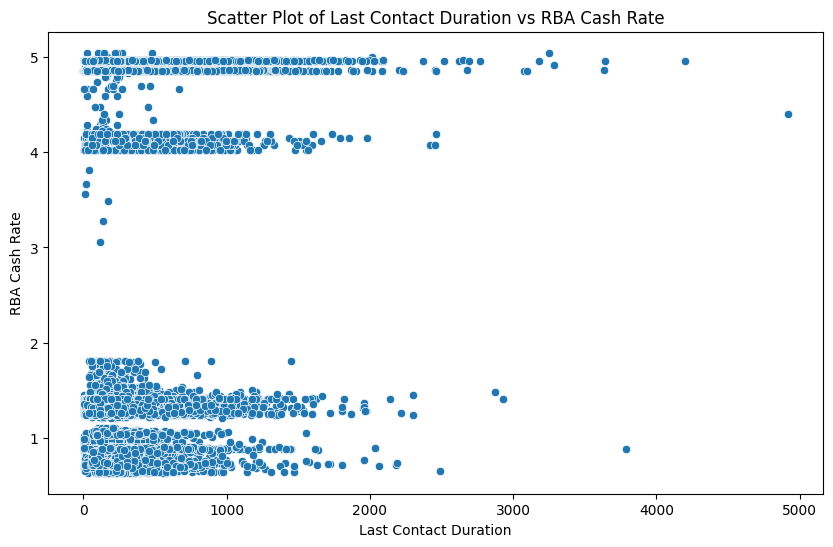

In [101]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=records, x='Last Contact Duration', y='RBA Cash Rate')
plt.title('Scatter Plot of Last Contact Duration vs RBA Cash Rate')
plt.xlabel('Last Contact Duration')
plt.ylabel('RBA Cash Rate')
plt.show()

*Explore relationships between each categorical variable and the target variable*

Qualification :

Qualification
Primary Education                            6996
Bachelor Degree Level or Higher              6815
High School Certificate                      5198
Graduate Diploma and Graduate Certificate    2934
Prefer not to say                             982
Pre-Primary Education                          15
Name: count, dtype: int64




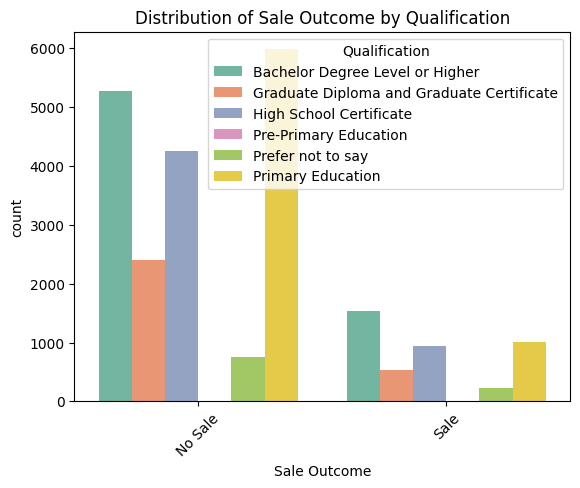

Occupation :

Occupation
Clerical and administrative       5850
Labourer                          5036
Technicians and Trades            3726
Community and personal service    2169
Manager                           1642
Retired                           1086
Entrepreneur                       813
Self-employed                      749
Housekeeper                        593
Student                            558
Unemployed                         536
Prefer not to say                  182
Name: count, dtype: int64




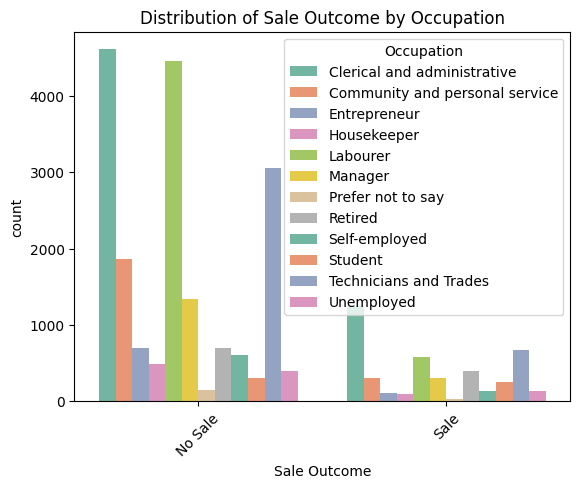

Marital Status :

Marital Status
Married              13804
Single                6526
Divorced              2559
Prefer not to say       51
Name: count, dtype: int64




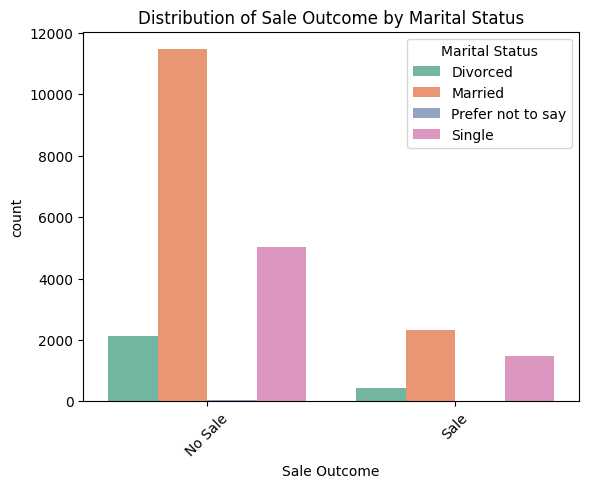

Home Mortgage :

Home Mortgage
Yes        12086
No         10284
Unknown      570
Name: count, dtype: int64




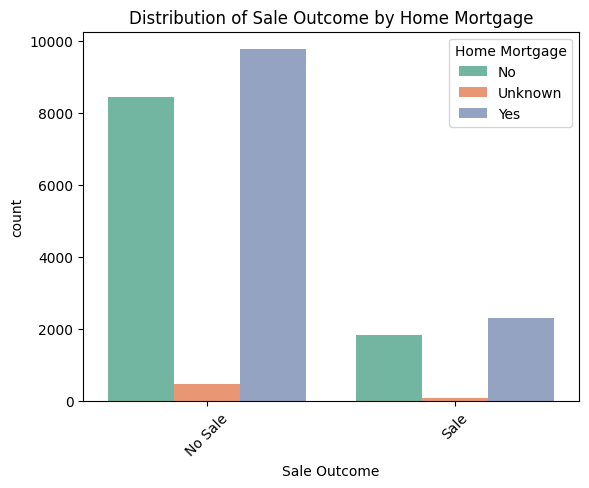

Personal Loan :

Personal Loan
No         18877
Yes         3493
Unknown      570
Name: count, dtype: int64




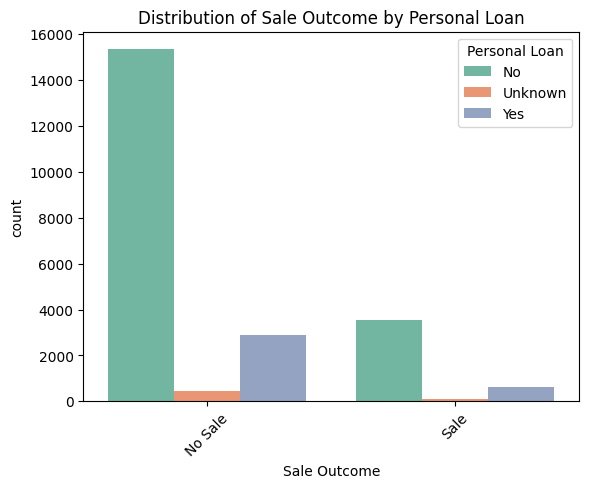

Has Other Bank Account :

Has Other Bank Account
No     18378
Yes     4562
Name: count, dtype: int64




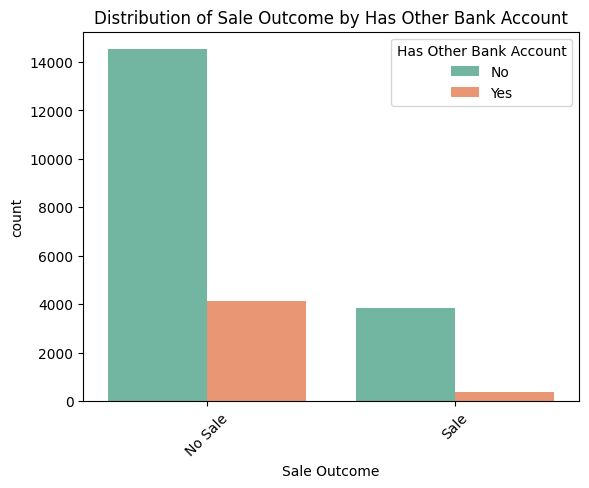

Last Contact Direction :

Last Contact Direction
Inbound     14904
Outbound     8036
Name: count, dtype: int64




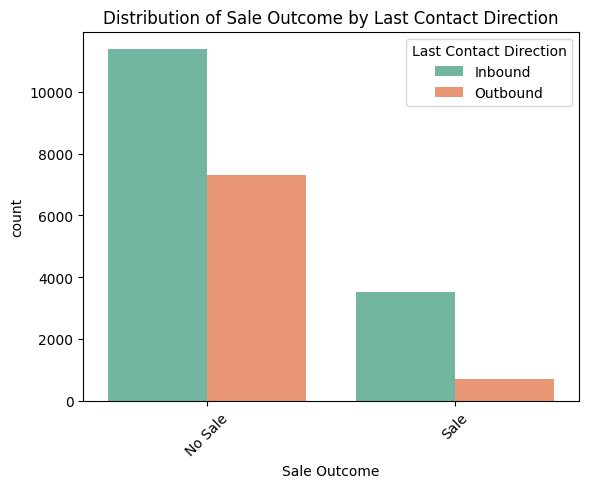

Last Contact Month :

Last Contact Month
May          7442
July         3919
August       3449
June         2937
November     2239
April        1534
October       509
September     393
March         389
December      129
Name: count, dtype: int64




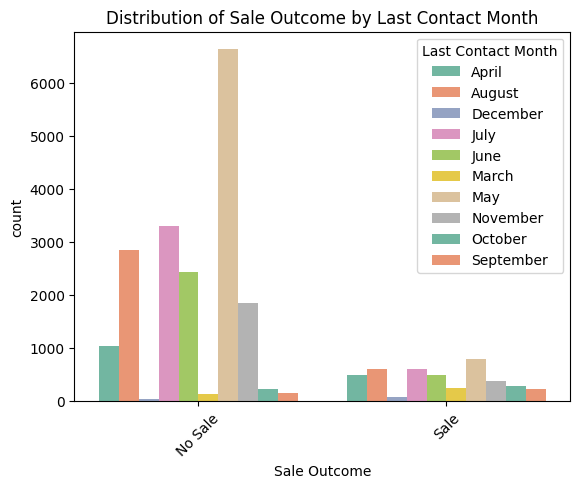

Last Contact Weekday :

Last Contact Weekday
Thursday     4812
Monday       4723
Wednesday    4567
Tuesday      4525
Friday       4313
Name: count, dtype: int64




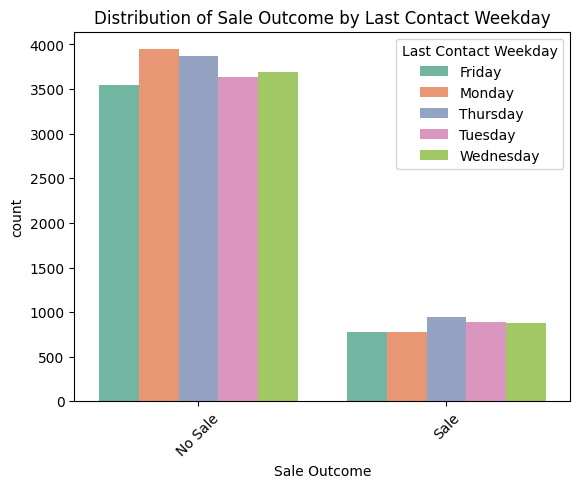

Previous Campaign Outcome :

Previous Campaign Outcome
Nonexistent    19505
No Sale         2381
Sale            1054
Name: count, dtype: int64




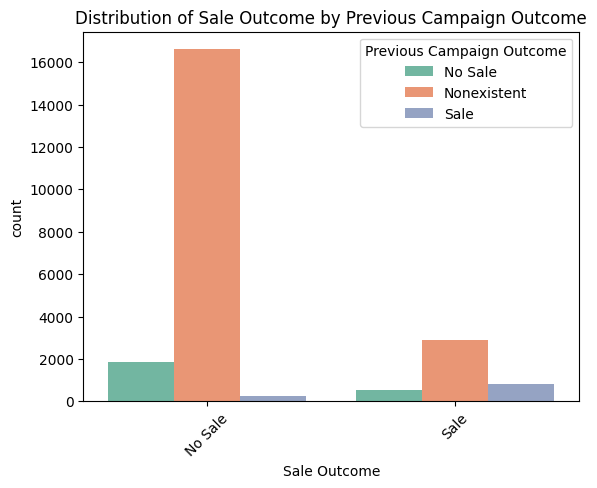

In [102]:
# List of categorical columns
cats = [
    'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction',
    'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome'
]

# Iterate through each categorical column to explore relationships
for i in cats:
    print(i, ':\n')
    print(records[i].value_counts())
    print('\n')
    sns.countplot(data=records, hue=i, x='Sale Outcome', palette='Set2')
    plt.title(f'Distribution of Sale Outcome by {i}')
    # Rotate labels on the x-axis
    plt.xticks(rotation=45)
    plt.show()

Qualification :

Qualification
Primary Education                            6996
Bachelor Degree Level or Higher              6815
High School Certificate                      5198
Graduate Diploma and Graduate Certificate    2934
Prefer not to say                             982
Pre-Primary Education                          15
Name: count, dtype: int64




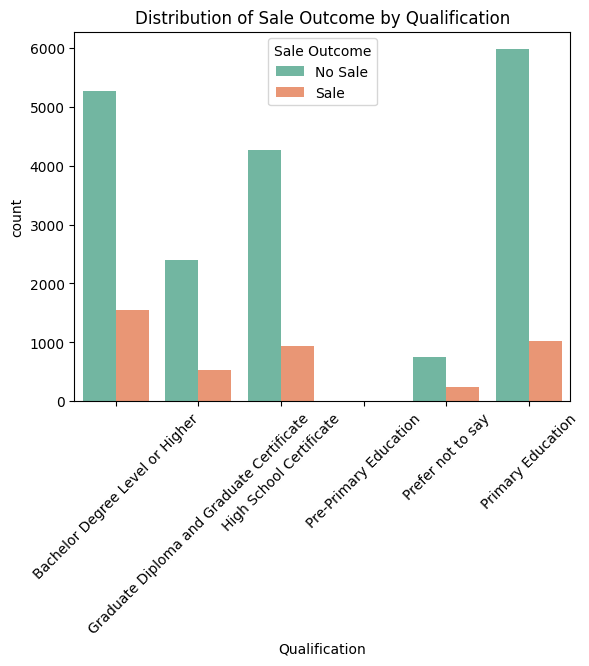

Occupation :

Occupation
Clerical and administrative       5850
Labourer                          5036
Technicians and Trades            3726
Community and personal service    2169
Manager                           1642
Retired                           1086
Entrepreneur                       813
Self-employed                      749
Housekeeper                        593
Student                            558
Unemployed                         536
Prefer not to say                  182
Name: count, dtype: int64




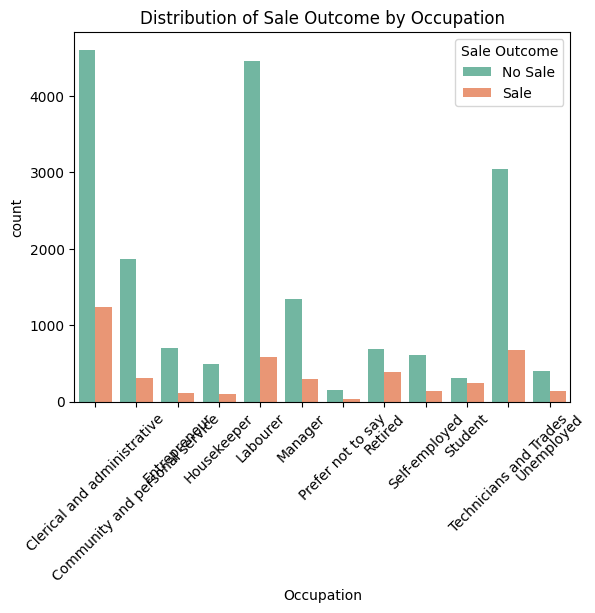

Marital Status :

Marital Status
Married              13804
Single                6526
Divorced              2559
Prefer not to say       51
Name: count, dtype: int64




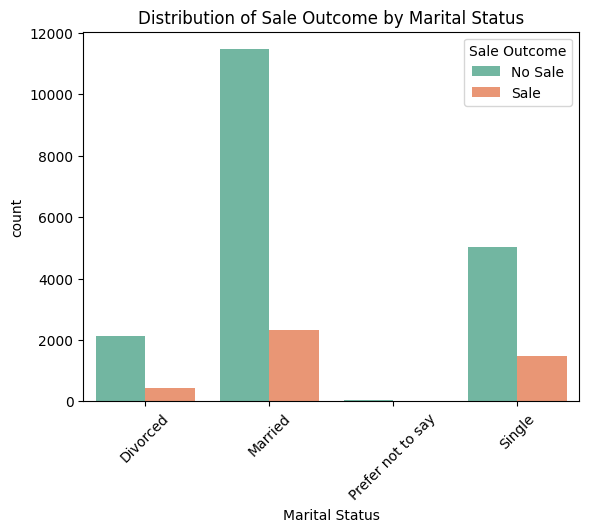

Home Mortgage :

Home Mortgage
Yes        12086
No         10284
Unknown      570
Name: count, dtype: int64




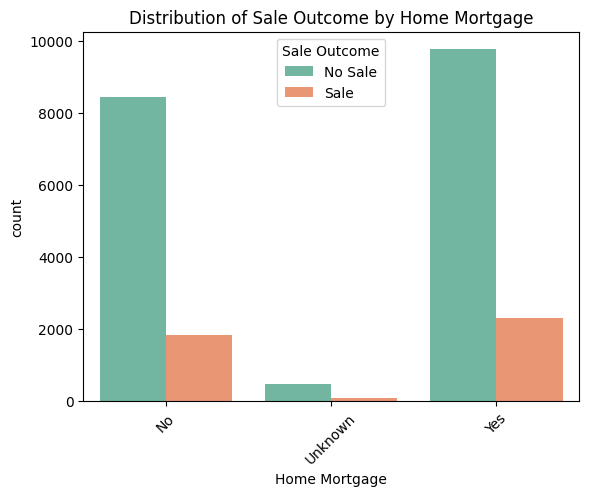

Personal Loan :

Personal Loan
No         18877
Yes         3493
Unknown      570
Name: count, dtype: int64




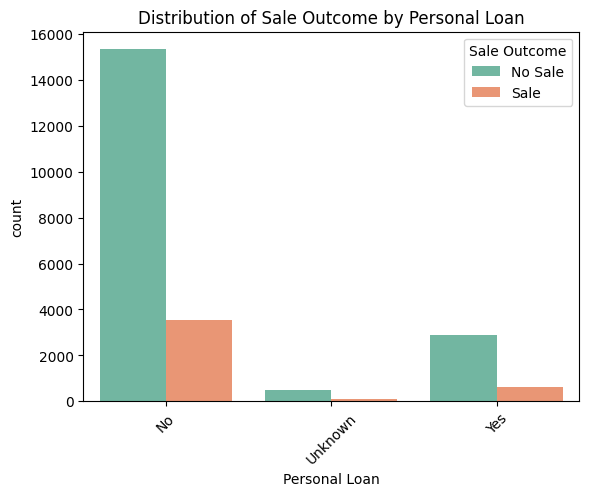

Has Other Bank Account :

Has Other Bank Account
No     18378
Yes     4562
Name: count, dtype: int64




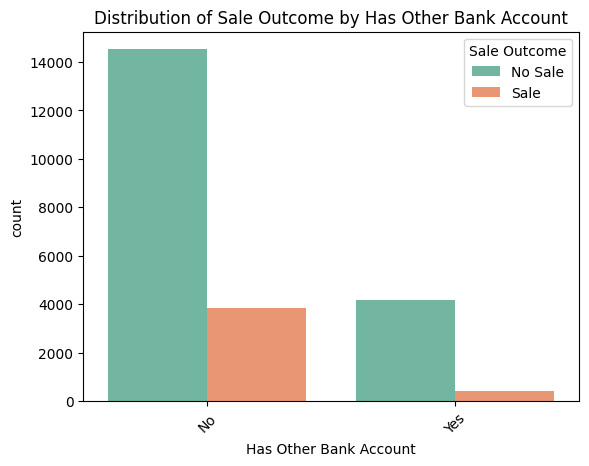

Last Contact Direction :

Last Contact Direction
Inbound     14904
Outbound     8036
Name: count, dtype: int64




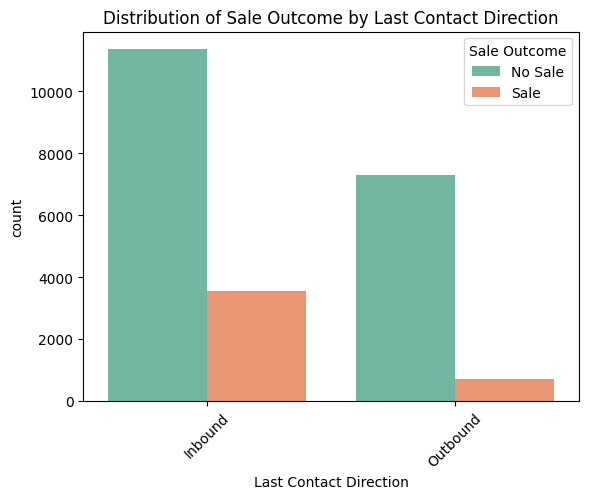

Last Contact Month :

Last Contact Month
May          7442
July         3919
August       3449
June         2937
November     2239
April        1534
October       509
September     393
March         389
December      129
Name: count, dtype: int64




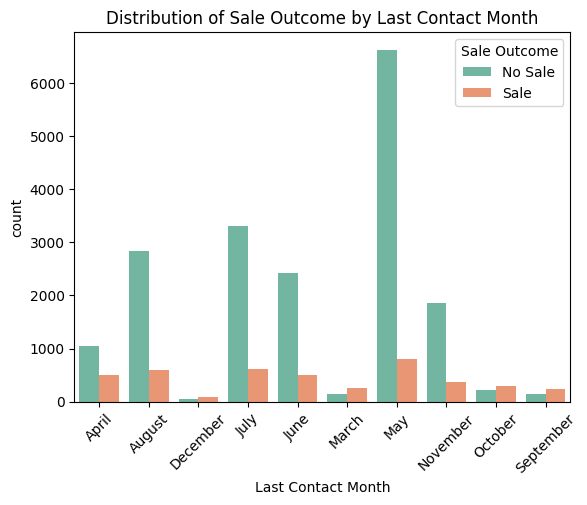

Last Contact Weekday :

Last Contact Weekday
Thursday     4812
Monday       4723
Wednesday    4567
Tuesday      4525
Friday       4313
Name: count, dtype: int64




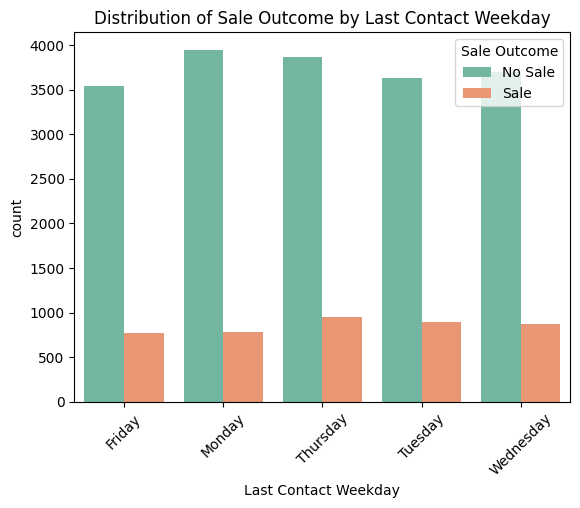

Previous Campaign Outcome :

Previous Campaign Outcome
Nonexistent    19505
No Sale         2381
Sale            1054
Name: count, dtype: int64




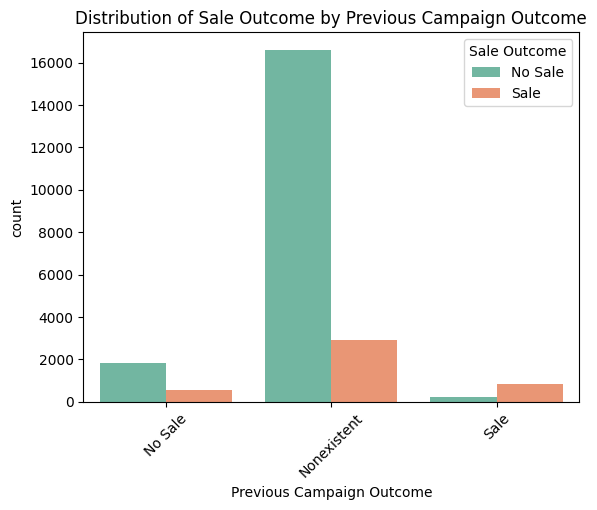

In [103]:
# List of categorical columns
cats = [
    'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction',
    'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome'
]

# Iterate through each categorical column to explore relationships
for i in cats:
    print(i, ':\n')
    print(records[i].value_counts())
    print('\n')
    sns.countplot(x=records[i], hue=records['Sale Outcome'], palette='Set2')
    plt.title(f'Distribution of Sale Outcome by {i}')
    # Rotate labels on the x-axis
    plt.xticks(rotation=45)
    plt.show()

In [104]:
cats_withoutChurn = [
    'Age', 'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction',
    'Last Contact Month', 'Last Contact Weekday', 'Number of Current Campaign Calls',
    'Number of Previous Campaign Calls', 'Previous Campaign Outcome'
]


In [105]:
from sklearn.metrics import mutual_info_score

In [106]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Encode categorical features and concatenate with numerical features
encoded_features = pd.DataFrame()

for cat in cats_withoutChurn:
    encoded_cat = encoder.fit_transform(records[[cat]])
    encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out([cat]))
    encoded_features = pd.concat([encoded_features, encoded_cat_df], axis=1)

# Calculate mutual information scores
mi_scores = {}

for column in encoded_features.columns:
    mi_scores[column] = mutual_info_classif(encoded_features[[column]], records['Sale Outcome'])[0]

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


Previous Campaign Outcome_Sale: 0.039
Previous Campaign Outcome_Nonexistent: 0.024
Last Contact Direction_Inbound: 0.024
Number of Previous Campaign Calls_0.0: 0.023
Last Contact Direction_Outbound: 0.020
Last Contact Month_May: 0.014
Has Other Bank Account_No: 0.013
Last Contact Month_October: 0.011
Has Other Bank Account_Yes: 0.011
Occupation_Labourer: 0.010
Number of Previous Campaign Calls_1.0: 0.009
Number of Previous Campaign Calls_2.0: 0.009
Last Contact Month_September: 0.007
Age_84: 0.007
Occupation_Retired: 0.007
Age_19: 0.007
Number of Previous Campaign Calls_3.0: 0.006
Number of Current Campaign Calls_1: 0.006
Marital Status_Married: 0.006
Home Mortgage_Yes: 0.006
Occupation_Student: 0.006
Age_46: 0.005
Last Contact Weekday_Thursday: 0.005
Last Contact Month_April: 0.005
Occupation_Self-employed: 0.005
Age_62: 0.005
Age_75: 0.005
Last Contact Month_March: 0.005
Personal Loan_No: 0.005
Age_63: 0.005
Age_80: 0.004
Last Contact Month_June: 0.004
Occupation_Housekeeper: 0.004
A

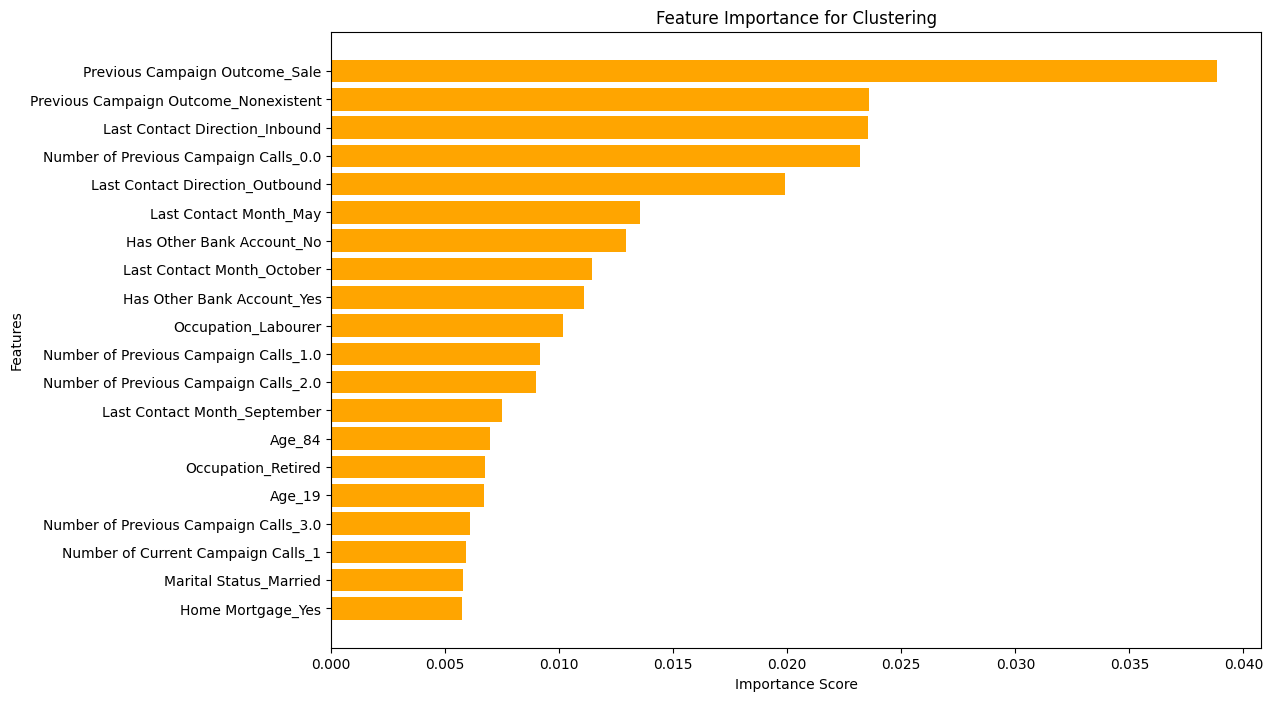

In [107]:
import matplotlib.pyplot as plt

# Extracting features and scores from sorted_scores
features, scores = zip(*sorted_scores)

# Optional: limit the number of features to display
top_n = 20  # Adjust as needed
features = features[:top_n]
scores = scores[:top_n]

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Clustering')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

# Adjust the y-axis labels
plt.yticks(fontsize=10)  # Adjust fontsize as needed
plt.show()


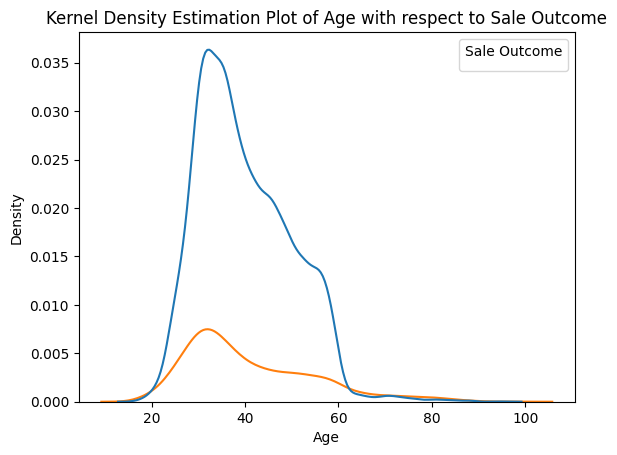

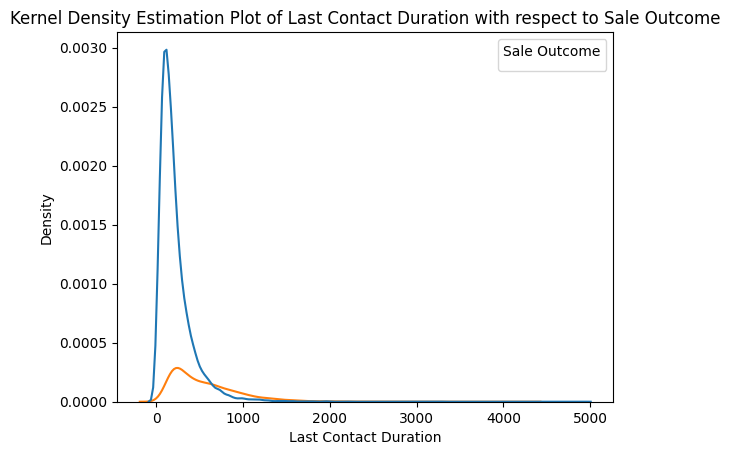

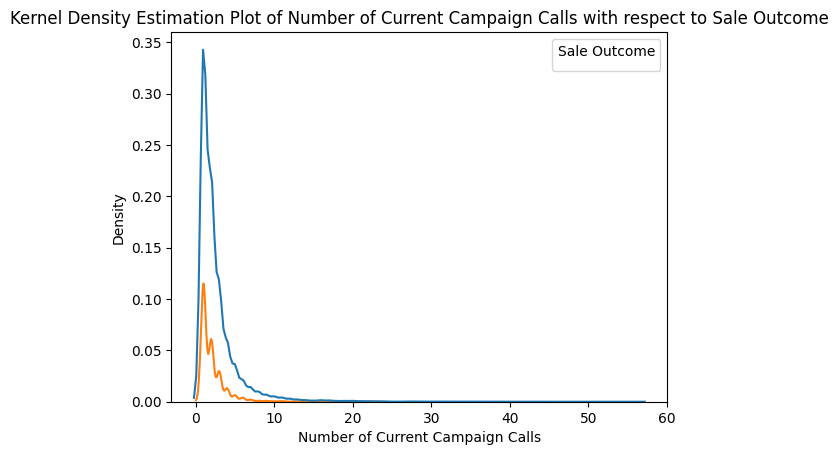

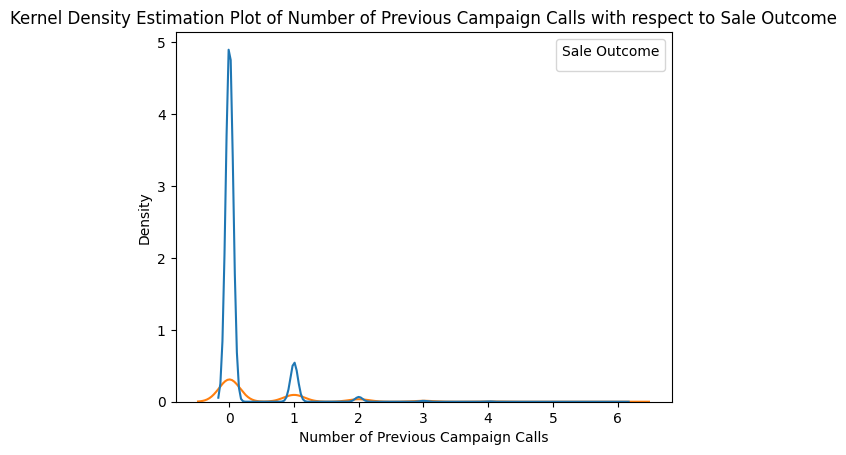

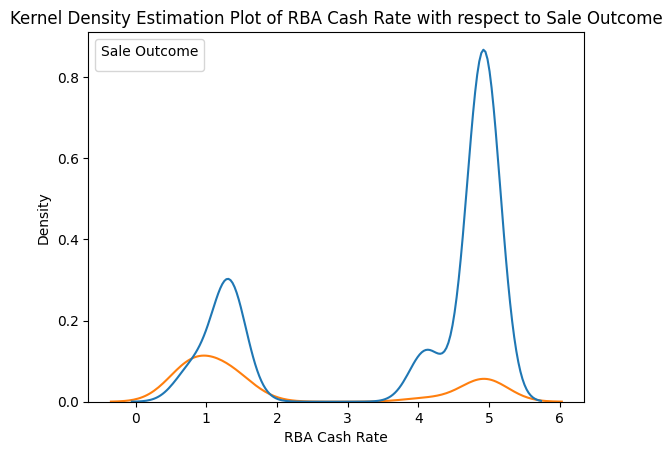

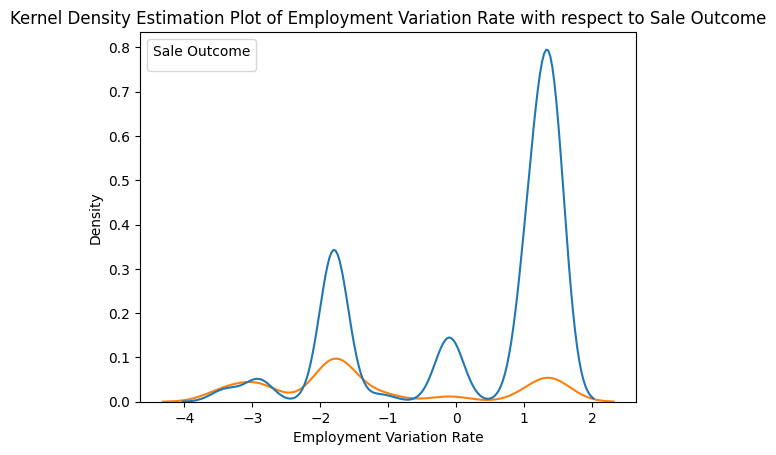

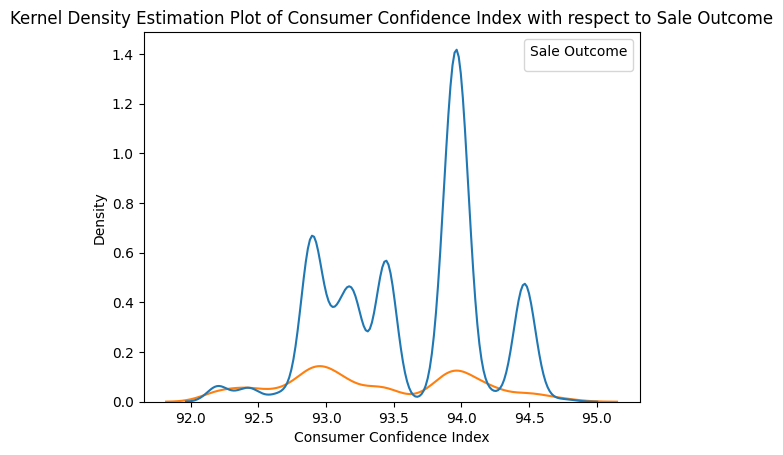

In [108]:
for i in nums:
    plt.figure()
    sns.kdeplot(data=records, x=i, hue='Sale Outcome')
    plt.title(f'Kernel Density Estimation Plot of {i} with respect to Sale Outcome')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.legend(title='Sale Outcome')
    plt.show()


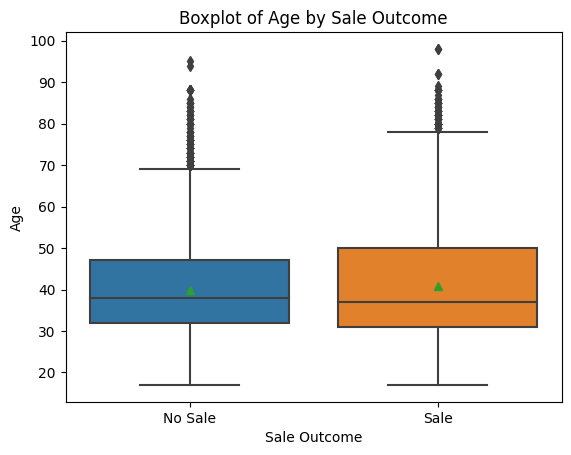

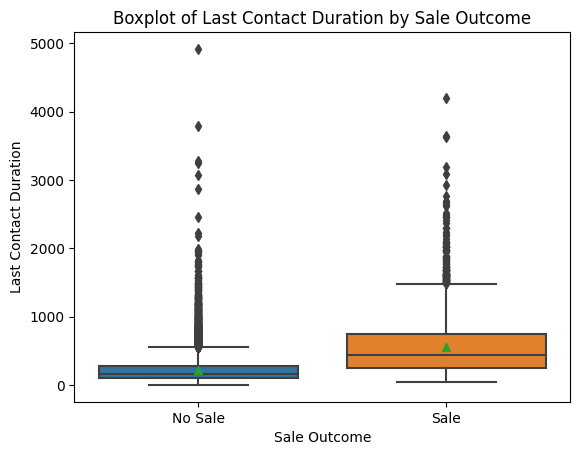

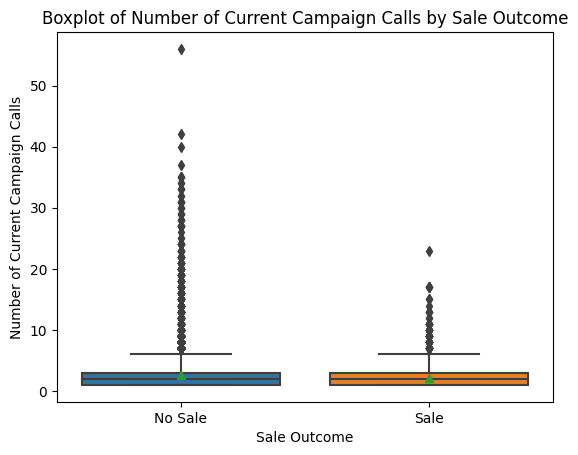

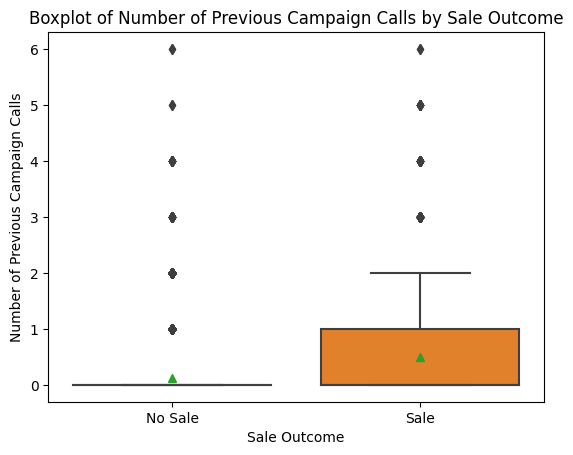

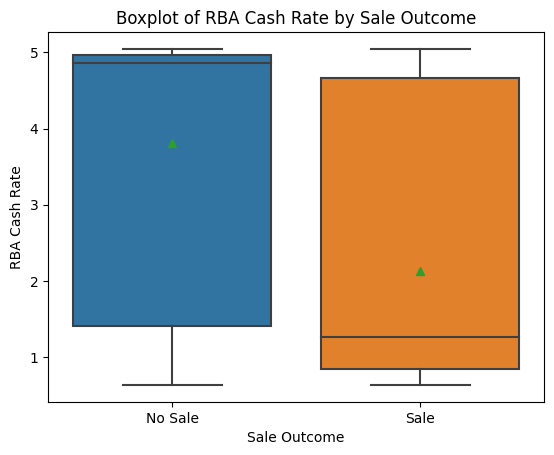

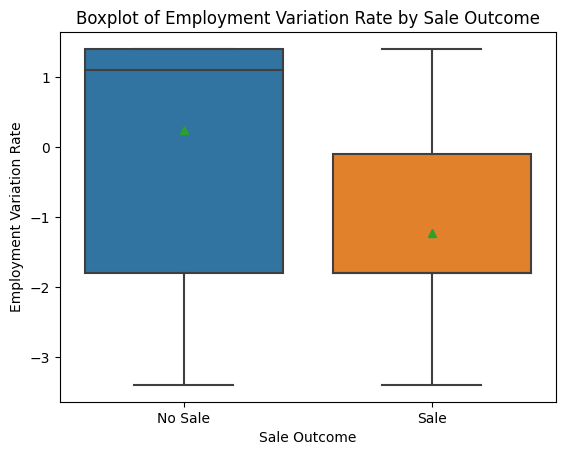

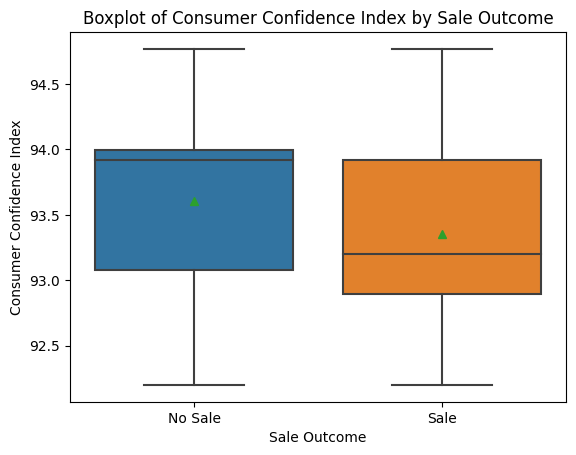

In [109]:
for i in nums:
    sns.boxplot(data=records, y=i, showmeans=True, x='Sale Outcome')
    plt.xlabel('Sale Outcome')
    plt.ylabel(i)
    plt.xticks([0, 1], ['No Sale', 'Sale'])
    plt.title(f'Boxplot of {i} by Sale Outcome')
    plt.show()


**Multivariate analysis**

*You can visualise more than 2 dimensions*

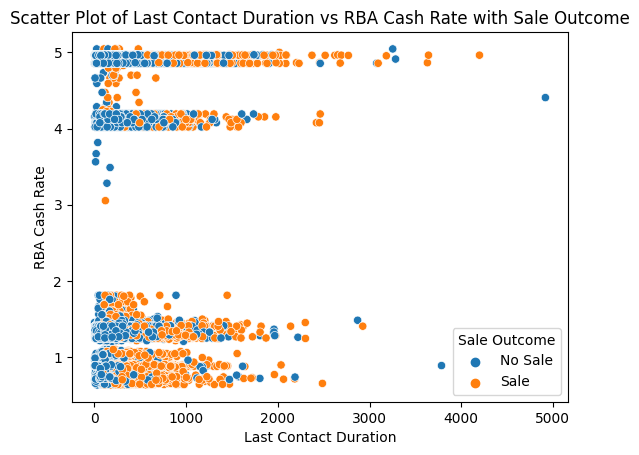

In [110]:
sns.scatterplot(data=records, x='Last Contact Duration', y='RBA Cash Rate', hue='Sale Outcome')
plt.title('Scatter Plot of Last Contact Duration vs RBA Cash Rate with Sale Outcome')
plt.xlabel('Last Contact Duration')
plt.ylabel('RBA Cash Rate')
plt.legend(title='Sale Outcome')
plt.show()


In [111]:
records.head()

,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
0,32,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,Yes,No,No,Inbound,172.0,July,Wednesday,2,0.0,Nonexistent,4.963,1.4,93.918,No Sale
1,39,Bachelor Degree Level or Higher,Clerical and administrative,Married,No,No,No,Outbound,744.0,May,Monday,6,0.0,Nonexistent,4.857,1.1,93.994,Sale
2,36,Graduate Diploma and Graduate Certificate,Technicians and Trades,Divorced,No,No,No,Inbound,31.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
3,44,Primary Education,Labourer,Married,Yes,No,No,Inbound,102.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
4,38,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,No,No,No,Outbound,436.0,May,Thursday,1,0.0,Nonexistent,4.860,1.1,93.994,No Sale


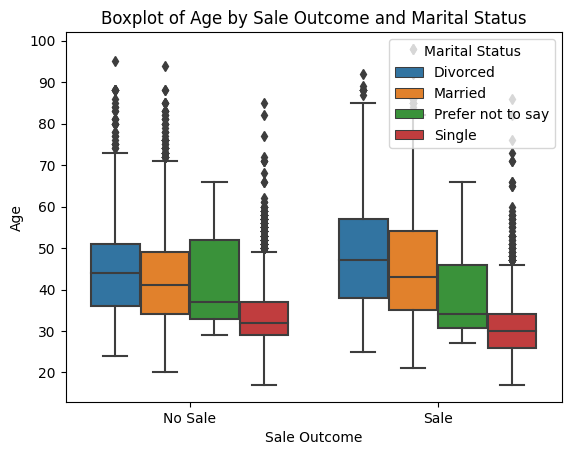

In [112]:
sns.boxplot(data=records, y='Age', x='Sale Outcome', hue='Marital Status')
plt.xlabel('Sale Outcome')
plt.ylabel('Age')
plt.title('Boxplot of Age by Sale Outcome and Marital Status')
plt.legend(title='Marital Status', loc='upper right')
plt.show()


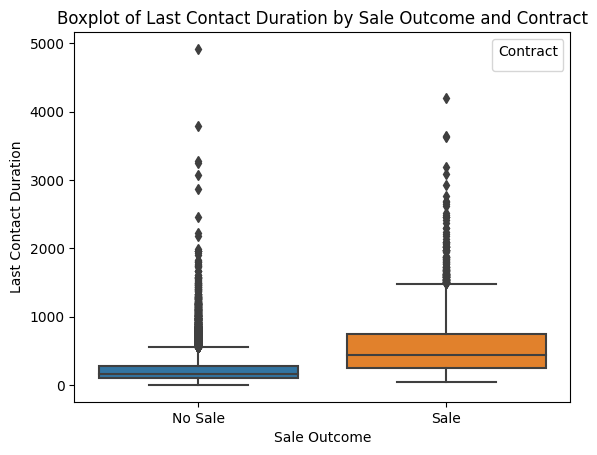

In [113]:
sns.boxplot(data=records, y='Last Contact Duration', x='Sale Outcome')
plt.xlabel('Sale Outcome')
plt.ylabel('Last Contact Duration')
plt.title('Boxplot of Last Contact Duration by Sale Outcome and Contract')
plt.legend(title='Contract', loc='upper right')
plt.show()


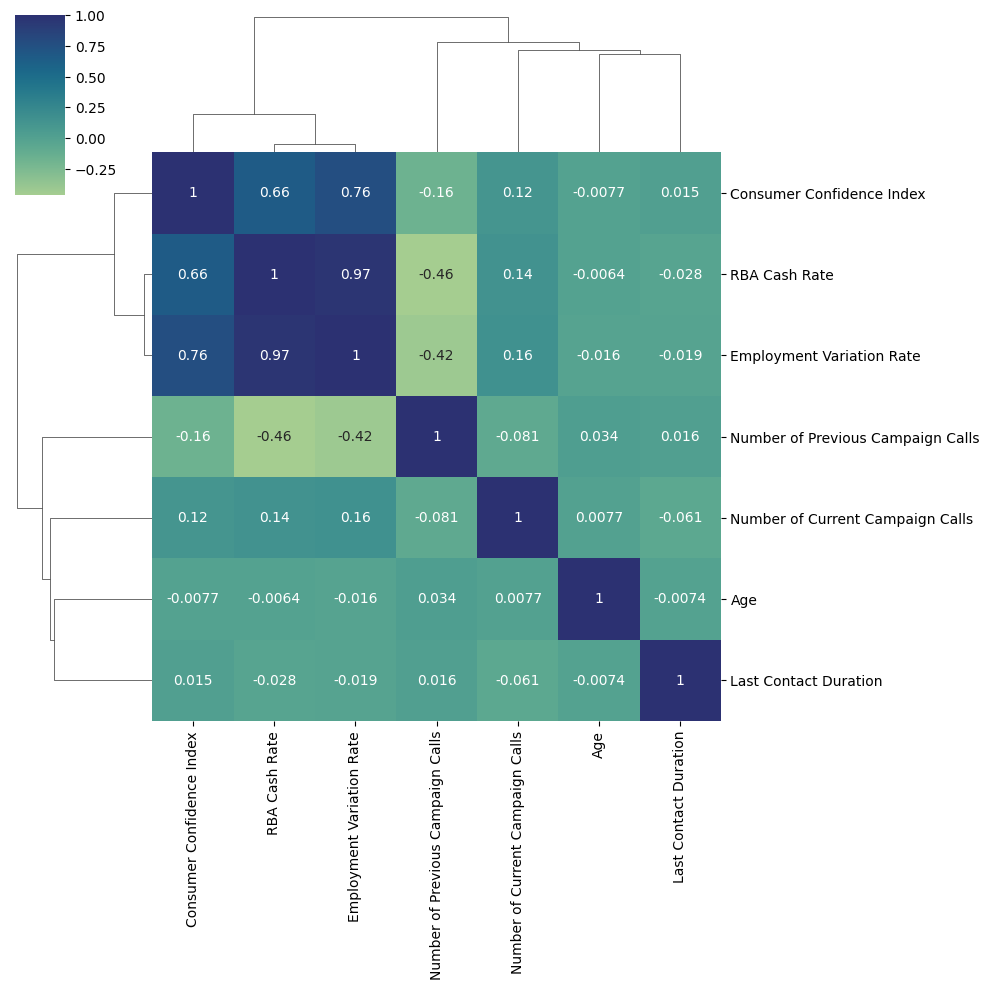

In [114]:
sns.clustermap(data=records[nums].corr(), annot=True, cmap='crest')



*   You may need to perform more bivariate and multivariable analyses depending on the datasets given to you, and domain expertise available.
*   You may need to read previous reports/papers to inform your EDA.



---



### **Data preparation**
* Data conversion
* Feature selection: X
* Scale data


In [115]:
def coding_sale_outcome(x):
    if x == 'Sale':
        return 1
    elif x == 'No Sale':
        return 0

records['Sale Outcome'] = records['Sale Outcome'].apply(coding_sale_outcome)


In [116]:
records['Sale Outcome'].value_counts()


Sale Outcome
0    18677
1     4263
Name: count, dtype: int64

In [117]:
records.head()

,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
0,32,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,Yes,No,No,Inbound,172.0,July,Wednesday,2,0.0,Nonexistent,4.963,1.4,93.918,0
1,39,Bachelor Degree Level or Higher,Clerical and administrative,Married,No,No,No,Outbound,744.0,May,Monday,6,0.0,Nonexistent,4.857,1.1,93.994,1
2,36,Graduate Diploma and Graduate Certificate,Technicians and Trades,Divorced,No,No,No,Inbound,31.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,0
3,44,Primary Education,Labourer,Married,Yes,No,No,Inbound,102.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,0
4,38,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,No,No,No,Outbound,436.0,May,Thursday,1,0.0,Nonexistent,4.860,1.1,93.994,0


In [118]:
features = ['Last Contact Duration', 'Number of Current Campaign Calls']

# Option 2
# features = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'RBA Cash Rate', 'Consumer Confidence Index']

X = records[features]

print(X)

       Last Contact Duration  Number of Current Campaign Calls
0                      172.0                                 2
1                      744.0                                 6
2                       31.0                                 1
3                      102.0                                 1
4                      436.0                                 1
...                      ...                               ...
22935                  921.0                                 3
22936                   75.0                                 2
22937                  192.0                                 1
22938                 1220.0                                12
22939                  236.0                                 3

[22940 rows x 2 columns]


In [119]:
X.describe()

,Last Contact Duration,Number of Current Campaign Calls
count,22940.000000,22940.000000
mean,281.823147,2.542938
std,285.375802,2.702480
min,0.000000,1.000000
25%,108.000000,1.000000
50%,192.000000,2.000000
75%,348.000000,3.000000
max,4918.000000,56.000000


In [120]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [121]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()


In [122]:
#Option 1

# Features to scale
features_to_scale = ['Last Contact Duration', 'Number of Current Campaign Calls']

# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X)

# Create DataFrames from the scaled values
X_features_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)
X_scaled = X_features_scaled




---



## **1.3. K-Means clustering**

### **Model building**

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [124]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=5
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2024)

#fit kmeans with X_scaled
kmeans.fit(X_scaled)

# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

## **1.4. Clustering Evaluation**
* Within-Cluster Sum of Squares
* Silhouette score


###**Within-Cluster Sum of Squares**
Within-Cluster Sum of Squares (WCSS) is the sum of the squared distance (Sum of Squared Errors SSE) between each data point and its assigned cluster center.

WCSS measures the compactness of the clusters, with lower values indicating tighter and more compact clusters.

Note: WCSS will always decrease as the number of clusters k increases, because a high k will make each cluster smaller and thus closer to its centroid. However, this doesn't mean that a high k is always better.

In [125]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 31.314


### **The Davies-Bouldin Index (DBI)**  

Davies-Bouldin index measures the ratio of the within-cluster compactness to the between-cluster separation (with the closest cluster). Lower values of the index indicate better clustering.


In [126]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.679


### **Silhouette score**

measures how well-separated the clusters are, and how similar the data points are within each cluster.

* The silhouette score ranges from -1 to 1.
* A score of 1 means that the data points within a cluster are very similar to each other, and very different from the data points in other clusters.

> *  0.7 or higher: the  clustering is good.
> *  0.5 to 0.7: the clustering is fair.
> *  below 0.5: clustering is poor.

* A score of 0 means that the data points are equally similar to neighboring clusters.
* A negative score means that the data points may have been assigned to the wrong cluster, there may be noise or outliers. clustering is sensitive to initiatlisation. Try it gain.

In [127]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.512


In [128]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [129]:
#fit kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_scaled)

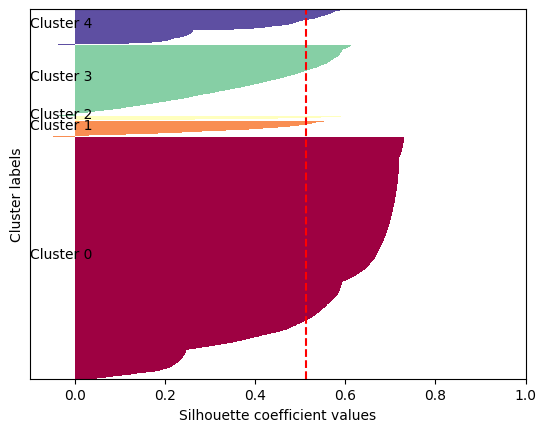

In [130]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot silhouette diagram
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

## **1.5. Optimising k**


### **Use the elbow method based on the SSE (WCSS) score**





In [131]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  3.223


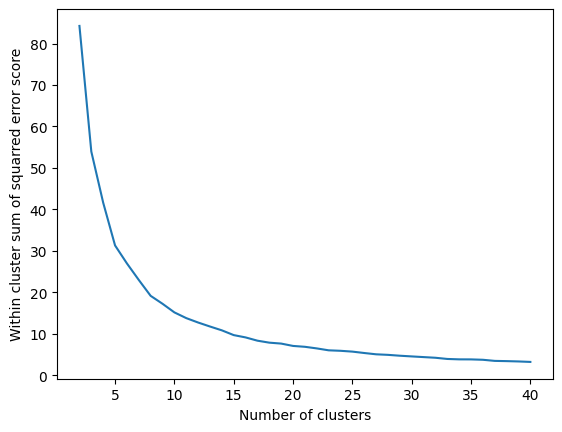

In [132]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

As k increases, clusters become smaller hence WCSS becomes smaller. Thus, WCSS along is not a good metric.

**Optimise the number of clusters based on davies_bouldin_score**

In [133]:
from sklearn.metrics import davies_bouldin_score

In [134]:
# Determine optimal number of clusters using the SSE metric
dbs_scores = []
best_k=3
best_dbs_score=1
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)
  kmeans.fit(X_scaled)
  dbs_score_k=davies_bouldin_score(X_scaled, kmeans.labels_)
  dbs_scores.append(dbs_score_k)
  if best_dbs_score > dbs_score_k:
    best_k = k
    best_dbs_score = dbs_score_k

print('Best k: ', best_k)
print('Best Davies Bouldin index: ', '%.3f' %best_dbs_score)

Best k:  3
Best Davies Bouldin index:  0.661


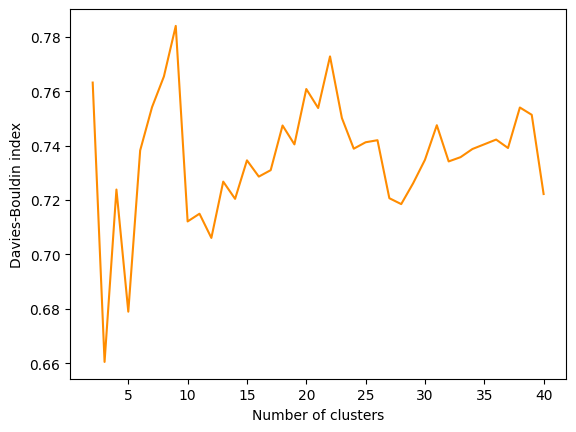

In [135]:
# Plot the Davies-Bouldin indices to determine optimal number of clusters
plt.plot(range(2,41), dbs_scores, color='darkorange', label='Davies Bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.show()

### **Optimise the number of clusters based on the silhouette score**

We can also plot the Silhouette Score against k and look for the "elbow" or the point where the Silhouette Score starts to diminish.

The Silhouette Score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. We should look for the number of clusters that gives the highest average Silhouette Score.

In [136]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  3
Best silhouette score:  0.617


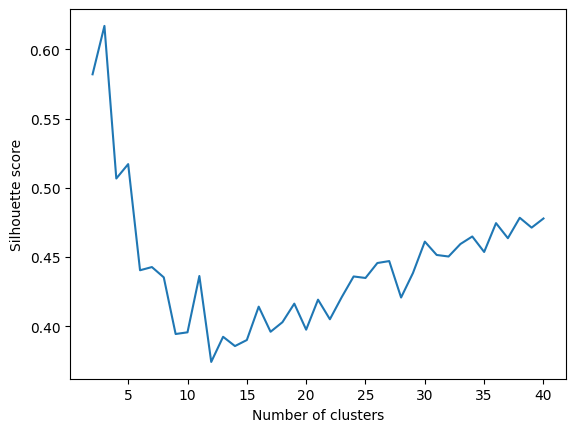

In [137]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()



**Let's create a graph to observe both metrics**

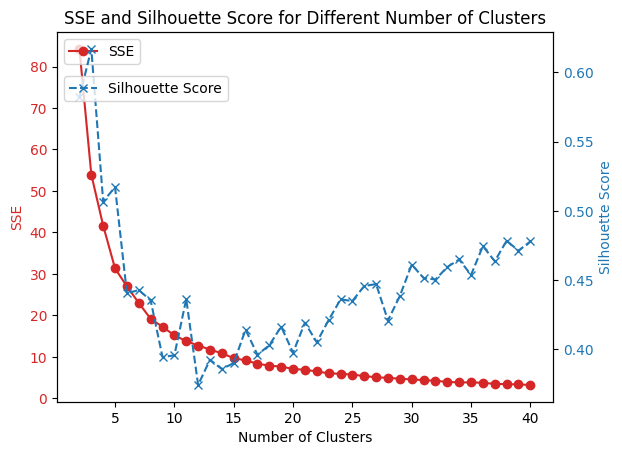

In [138]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

## **1.6 Model Selection**

'Model' denotes the representation or structure that the algorithm has learned from the data.

In [139]:
# let's go with k=3
n_clusters=3

In [140]:
# initialise the model object
kmeans = KMeans(n_clusters=best_k,n_init='auto', random_state=2024)

#Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init='auto', random_state=2024)

In [141]:
# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

In [142]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)


Within-Cluster Sum of Squares (WCSS): 53.616
Davies Bouldin index: 0.661
Silhouette score: 0.615


**Let's create the silhouette plot**

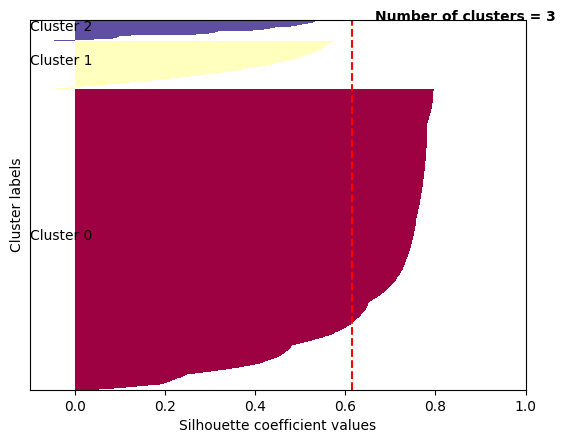

In [143]:
# Compute sample silhouette scores
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create a color map
cmap = cm.get_cmap("Spectral")

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

The evaluation and optimisation are mathematically based, we need to post analyse them. In addition, domain expertise is important to make sense if the clusters are meaningful, applicable and ethical.

## **1.7 Post-analysis for Cluster Profiling**

*Examine the Cluster size*

In [144]:
cluster_count=records.Cluster.value_counts()
cluster_count

Cluster
0    18691
1     3022
2     1227
Name: count, dtype: int64

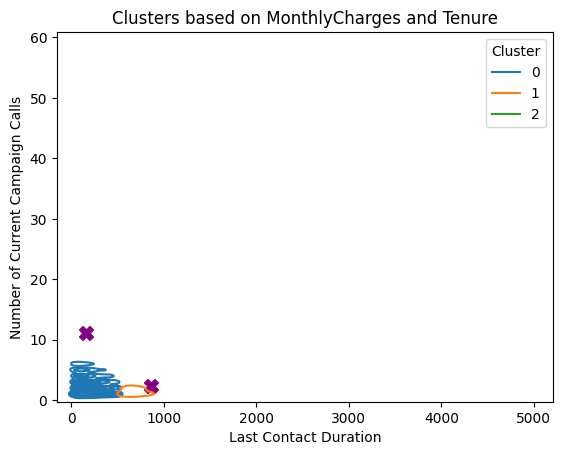

In [145]:
# Get centroids from the kmeans model. It is based on X_scaled.
centroids = kmeans.cluster_centers_[:, :2]

# Reverse the scaling on the centroids. (Remember, we scaled 'MonthlyCharges' and 'tenure' ).
centroids_original = scaler.inverse_transform(centroids)

# Create the KDE plot for the records
sns.kdeplot(data=records, x='Last Contact Duration', y='Number of Current Campaign Calls', hue='Cluster', palette='tab10', legend='full')

monthly_charges_centroids = centroids_original[:, 0]  # 0 is the index for 'MonthlyCharges'
tenure_centroids = centroids_original[:, 1]          # 1 is the index for 'tenure'

# Overlay the centroids on the same plot
plt.scatter(monthly_charges_centroids, tenure_centroids, c='purple', marker='X', s=100, label='Centroids')

# Setting the title and labels
plt.title('Clusters based on MonthlyCharges and Tenure')
plt.xlabel('Last Contact Duration')
plt.ylabel('Number of Current Campaign Calls')
#plt.legend(loc='upper right')

plt.show()


In [146]:
records.head()

,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome,Cluster
0,32,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,Yes,No,No,Inbound,172.0,July,Wednesday,2,0.0,Nonexistent,4.963,1.4,93.918,0,0
1,39,Bachelor Degree Level or Higher,Clerical and administrative,Married,No,No,No,Outbound,744.0,May,Monday,6,0.0,Nonexistent,4.857,1.1,93.994,1,1
2,36,Graduate Diploma and Graduate Certificate,Technicians and Trades,Divorced,No,No,No,Inbound,31.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,0,0
3,44,Primary Education,Labourer,Married,Yes,No,No,Inbound,102.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,0,0
4,38,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,No,No,No,Outbound,436.0,May,Thursday,1,0.0,Nonexistent,4.860,1.1,93.994,0,0


       Age                              Qualification  \
0       32  Graduate Diploma and Graduate Certificate   
1       39            Bachelor Degree Level or Higher   
2       36  Graduate Diploma and Graduate Certificate   
3       44                          Primary Education   
4       38  Graduate Diploma and Graduate Certificate   
...    ...                                        ...   
22935   29                    High School Certificate   
22936   83                          Prefer not to say   
22937   29                          Primary Education   
22938   46            Bachelor Degree Level or Higher   
22939   35                          Prefer not to say   

                        Occupation Marital Status Home Mortgage Personal Loan  \
0           Technicians and Trades        Married           Yes            No   
1      Clerical and administrative        Married            No            No   
2           Technicians and Trades       Divorced            No         

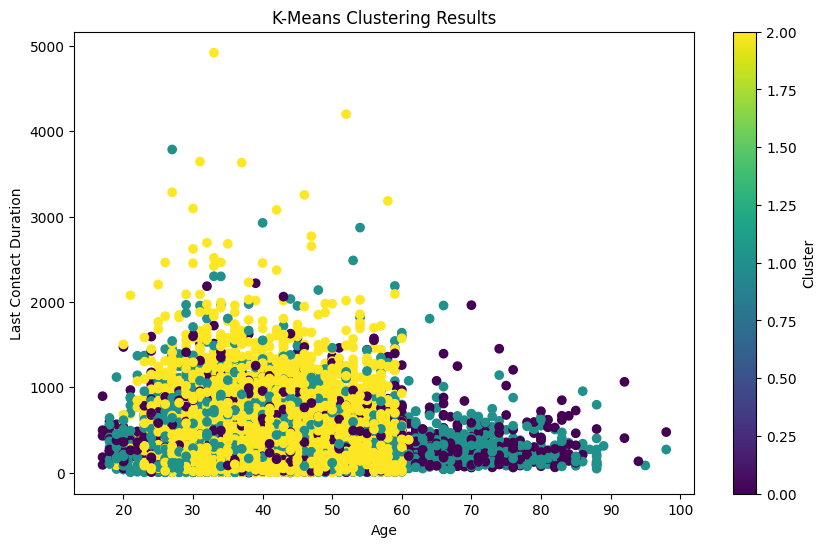

In [147]:
records = pd.DataFrame(records)

# Define categorical and numerical columns
categorical_columns = ['Qualification', 'Occupation', 'Marital Status', 'Home Mortgage', 'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome']
numerical_columns = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(records[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Scale numerical variables
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(records[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical features
processed_data = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(processed_data)

# Add cluster labels to the original DataFrame
records['Cluster'] = clusters

# Print the resulting DataFrame with cluster labels
print(records)

# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(records['Age'], records['Last Contact Duration'], c=records['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Last Contact Duration')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()